In [1]:
#Jump to: Maximizing/Matching CONTROL
 #or: Maximizing/Matching SOCIAL  

In [2]:
import csv
import pandas as pd
import numpy as np
import glob
import matplotlib
import scipy as sp
from matplotlib import pyplot as plt
from itertools import cycle, islice
from scipy import stats

import seaborn as sns

In [3]:
def organize_trial_by_trial(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"game number", 1:"trial", 2:"player", 3:"arm", 4:"probability", 5:"reward", 6:"time", 7:"P1 score", 8:"P2 score"})
    #drops first 20 trials of game 1
    #remove if you want to analyze the whole session
    df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.drop(['reward', 'time'], axis=1)
    df = df.apply(pd.to_numeric)
    df.head()
    
    return df

In [4]:
#0 means "next" button
#need to exclude zero?

def organize_trial_by_trial_floatclick(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"type", 1:"game number", 2:"trial", 3:"player", 4:"arm", 5:"probability", 6:"P1 score", 7:"P2 score", 8:""})
    #have 402 so need to restrict
    df = df[41:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.drop(['type'], axis=1)
    df = df.apply(pd.to_numeric)
    df.head()
    
    return df

In [5]:
def organize_trial_by_trial_300(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"type", 1:"game number", 2:"trial", 3:"player", 4:"arm", 5:"probability", 6:"reward", 7:"time", 8:"P1 score", 9:"P2 score"})
    df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.drop(['type', 'time', 'reward'], axis=1)
    df = df.apply(pd.to_numeric)
    df.head()
    
    return df

In [6]:
def get_score(df, player_number, game_number):
    if game_number == 1:
        row = 199
    elif game_number == 2:
        row = 399
    if player_number == 1:
        column = 'P1 score'
    elif player_number == 2:
        column = 'P2 score'
    score = df.loc[row, column]
    return score

In [7]:
#create a dataframes for scores
scores = pd.DataFrame(columns=['s_g1','s_g2','c_g1','c_g2', 'j_g1', 'j_g2', 'm_g1', 'm_g2'])

In [8]:
#version is 's' for single player and 'j' for joint
def call_get_score(df, version):
    p1_g1 = get_score(df, 1, 1)
    p1_g2 = get_score(df, 1, 2)
    p1_score_diff = p1_g2 - p1_g1
    if version == 'j':
        p1_g1 = get_score(df, 1, 1)
        p1_g2 = get_score(df, 1, 2)
        p1_score_diff = p1_g2 - p1_g1
        p2_g1 = get_score(df, 2, 1)
        p2_g2 = get_score(df, 2, 2)
        p2_score_diff = p2_g2 - p2_g1
        return p1_g1, p1_g2, p2_g1, p2_g2, p1_score_diff, p2_score_diff
    if version == 'm':
        p1_g1 = get_score(df, 1, 1)
        p1_g2 = get_score(df, 1, 2)
        p1_score_diff = p1_g2 - p1_g1
        p2_g1 = get_score(df, 2, 1)
        p2_g2 = get_score(df, 2, 2)
        p2_score_diff = p2_g2 - p2_g1
        return p1_g1, p1_g2, p2_g1, p2_g2, p1_score_diff, p2_score_diff
    return p1_g1, p1_g2, p1_score_diff

In [9]:
#separate data frames for p1 and p2 
def separate_df(df, version):
    #df.set_index(df['trial'])
    df_p1 = df[df['player'] == 1]
    df_p1_g1 = df_p1[df['game number'] == 1]
    df_p1_g2 = df_p1[df['game number'] == 2]
    #remove first 20 trials for g2
    df_p1_g2 = df_p1_g2[20:100]
    if version == 's':
        return df_p1_g1, df_p1_g2
    if version == 'c':
        return df_p1_g1, df_p1_g2
    df_p2 = df[df['player'] ==2 ]
    df_p2_g1 = df_p2[df['game number'] == 1]
    df_p2_g2 = df_p2[df['game number'] == 2]
    df_p2_g2= df_p2_g2[20:100]
    return df_p1_g1, df_p1_g2, df_p2_g1, df_p2_g2

In [10]:
#notes from Binghong:

#see reshape to restrict csv file size
#https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.reshape.html 
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html
#https://www.w3schools.com/python/numpy_array_shape.asp 
#https://stackoverflow.com/

#use drop to filter data frames or cut
#Df=df[20:]

#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html 
#drop columns, python, df

# Single Player Analysis

In [11]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s01_gamedata.csv')
s01 = df
s01_p1_g1_score,s01_p1_g2_score,s01_score_diff = call_get_score(s01, 's')
s01.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,90,13,20
41,1,21,2,1,90,13,21
42,1,22,1,3,60,13,21
43,1,22,2,1,90,13,22
44,1,23,1,3,60,13,22


In [12]:
#in the s files, p2 is the confederate
#df = organize_trial_by_trial('data/s02_gamedata.csv')
#s02 = df
#s02_p1_g1_score = get_score(s02, 1, 1)
#s02.head()

In [13]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s03_gamedata.csv')
s03 = df
s03_p1_g1_score,s03_p1_g2_score,s03_score_diff = call_get_score(s03, 's')
s03.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,30,11,19
41,1,21,2,1,90,11,20
42,1,22,1,1,90,12,20
43,1,22,2,1,90,12,21
44,1,23,1,2,60,13,21


In [14]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s05_gamedata.csv')
s05 = df
s05_p1_g1_score,s05_p1_g2_score,s05_score_diff = call_get_score(s05, 's')
s05.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,90,19,19
41,1,21,2,1,90,19,20
42,1,22,1,3,90,20,20
43,1,22,2,1,90,20,21
44,1,23,1,3,90,21,21


In [15]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s06_gamedata.csv')
s06 = df
s06_p1_g1_score,s06_p1_g2_score,s06_score_diff = call_get_score(s06, 's')
s06.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,90,19,19
41,1,21,2,1,90,19,20
42,1,22,1,3,90,20,20
43,1,22,2,1,90,20,21
44,1,23,1,3,90,20,21


In [16]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s07_gamedata.csv')
s07 = df
s07_p1_g1_score,s07_p1_g2_score,s07_score_diff = call_get_score(s07, 's')
s07.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,90,12,19
41,1,21,2,1,90,12,20
42,1,22,1,3,60,13,20
43,1,22,2,1,90,13,21
44,1,23,1,2,30,14,21


In [17]:
pd.set_option('display.max_columns', None)  

In [18]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s08_gamedata.csv')
s08 = df
s08_p1_g1_score,s08_p1_g2_score,s08_score_diff = call_get_score(s08, 's')
s08.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,90,18,19
41,1,21,2,1,90,18,20
42,1,22,1,2,90,19,20
43,1,22,2,1,90,19,21
44,1,23,1,2,90,20,21


In [19]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/s09_gamedata.csv')
s09 = df
s09_p1_g1_score,s09_p1_g2_score,s09_score_diff = call_get_score(s09, 's')
s09.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,30,12,16
41,1,21,2,1,90,12,17
42,1,22,1,2,30,12,17
43,1,22,2,1,90,12,18
44,1,23,1,1,90,13,18


In [20]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/s11_gamedata.csv')
s11 = df
s11_p1_g1_score,s11_p1_g2_score,s11_score_diff = call_get_score(s11, 's')
s11.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,21,2,0,90,12,19
42,1,22,1,1,30,12,19
43,1,22,2,0,90,13,19
44,1,23,1,3,90,13,20
45,1,23,2,0,90,14,20


In [21]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_300('data/s12_gamedata.csv')
s12 = df
s12_p1_g1_score,s12_p1_g2_score,s12_score_diff = call_get_score(s12, 's')
s12.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,90,15,19
41,1,21,2,1,90,15,20
42,1,22,1,2,60,16,20
43,1,22,2,1,90,16,21
44,1,23,1,2,60,17,21


In [22]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/s15_gamedata.csv')
s15 = df
s15_p1_g1_score,s15_p1_g2_score,s15_score_diff = call_get_score(s15, 's')
s15.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,21,2,0,90,12,18
42,1,22,1,2,90,12,19
43,1,22,2,0,90,13,19
44,1,23,1,2,90,13,20
45,1,23,2,0,90,14,20


In [23]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/s16_gamedata.csv')
s16 = df
s16_p1_g1_score,s16_p1_g2_score,s16_score_diff = call_get_score(s16, 's')
s16.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,21,2,0,90,12,19
42,1,22,1,2,30,12,20
43,1,22,2,0,90,12,20
44,1,23,1,3,60,12,21
45,1,23,2,0,90,13,21


In [24]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_300('data/s19_gamedata.csv')
s19 = df
s19_p1_g1_score,s19_p1_g2_score,s19_score_diff = call_get_score(s19, 's')
s19.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,60,11,16
41,1,21,2,1,90,11,17
42,1,22,1,3,30,11,17
43,1,22,2,1,90,11,18
44,1,23,1,2,60,12,18


In [25]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/s17_gamedata.csv')
s17 = df
s17_p1_g1_score,s17_p1_g2_score,s17_score_diff = call_get_score(s17, 's')
s17.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,21,2,0,90,15,19
42,1,21,1,2,90,15,20
43,1,22,2,0,90,16,20
44,1,22,1,2,90,16,21
45,1,23,2,0,90,17,21


In [26]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/s20_gamedata.csv')
s20 = df
s20_p1_g1_score,s20_p1_g2_score,s20_score_diff = call_get_score(s20, 's')
s20.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,21,2,0,90,11,19
42,1,22,1,3,30,11,20
43,1,22,2,0,90,11,20
44,1,23,1,1,90,11,21
45,1,23,2,0,90,12,21


# Single score diff between G1 and G2

In [27]:
score_diff = pd.DataFrame({'participant':['s01','s03', 's05', 
                               's06', 's07', 's08', 's09', 's11', 's12', 's15', 's16', 's17', 's19', 's20'], 'score_diff':
     [s01_score_diff, s03_score_diff, s05_score_diff, s06_score_diff,
      s07_score_diff, s08_score_diff, s09_score_diff, s11_score_diff, s12_score_diff, s15_score_diff, s16_score_diff, s17_score_diff, s19_score_diff, s20_score_diff]})

In [28]:
score_diff

,participant,score_diff
0,s01,14
1,s03,8
2,s05,11
3,s06,5
4,s07,5
5,s08,-10
6,s09,5
7,s11,1
8,s12,3
9,s15,15


In [29]:
score_diff_mean = score_diff['score_diff'].mean()

In [30]:
score_diff_mean

4.0

# Single scores in G1 and G2

In [31]:
#list out all the scores in game 1 by participant
s_scores_1 = pd.DataFrame({'participant':['s01','s03', 's05', 
                               's06', 's07', 's08', 's09', 's11', 's12', 's15', 's16', 's17', 's19', 's20'], 'score_1':
     [s01_p1_g1_score, s03_p1_g1_score, s05_p1_g1_score,
      s06_p1_g1_score, s07_p1_g1_score, s08_p1_g1_score, s09_p1_g1_score, s11_p1_g1_score, s12_p1_g1_score, s15_p1_g1_score, s16_p1_g1_score, s17_p1_g1_score, s19_p1_g1_score, s20_p1_g1_score]})
#to prevent an extra column that numbers each row:
s_scores_1.set_index('participant', inplace=True, drop=True)

#print
s_scores_1

,score_1
participant,
s01,60
s03,63
s05,77
s06,82
s07,63
s08,90
s09,65
s11,60
s12,83


In [32]:
#list out all the scores in game 2 by participant
s_scores_2 = pd.DataFrame({'participant':['s01', 's03', 's05', 
                               's06', 's07', 's08', 's09', 's11', 's12', 's15', 's16', 's17', 's19', 's20'], 'score_2':
    [s01_p1_g2_score, s03_p1_g2_score, s05_p1_g2_score, 
s06_p1_g2_score, s07_p1_g2_score, s08_p1_g2_score, s09_p1_g2_score, s11_p1_g2_score, s12_p1_g2_score, s15_p1_g2_score, s16_p1_g2_score, s17_p1_g2_score, s19_p1_g2_score, s20_p1_g2_score]})

#to prevent an extra column that numbers each row:
s_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)
s_scores_2

,score_2
participant,
s01,74
s03,71
s05,88
s06,87
s07,68
s08,80
s09,70
s11,61
s12,86


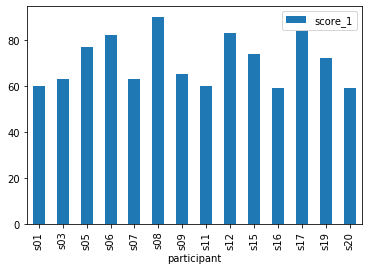

In [33]:
s_scores_1_bar = s_scores_1.plot.bar()

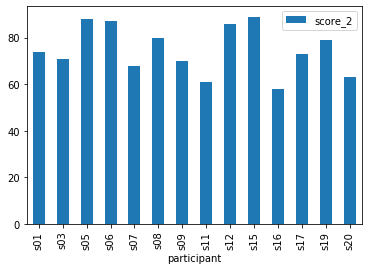

In [34]:
s_scores_2_bar = s_scores_2.plot.bar()

In [35]:
#merge both games by participant:
s_scores = pd.merge(s_scores_1, s_scores_2,on='participant')

In [36]:
s_scores = pd.merge(s_scores_1, s_scores_2,on='participant')
#label columns
s_scores.columns=['Game 1','Game 2']

In [37]:
s_scores

,Game 1,Game 2
participant,,
s01,60,74
s03,63,71
s05,77,88
s06,82,87
s07,63,68
s08,90,80
s09,65,70
s11,60,61
s12,83,86


([<matplotlib.axis.YTick at 0x1a240cae50>,
 <a list of 6 Text yticklabel objects>)

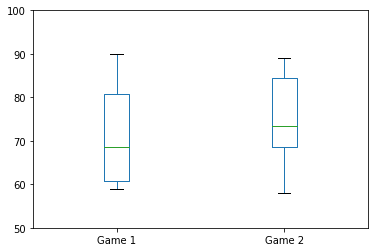

In [38]:
s_scores_box = s_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

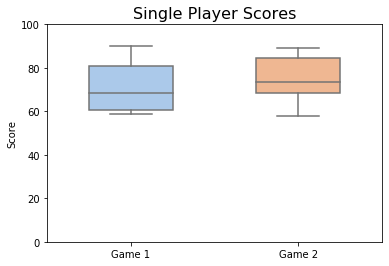

In [39]:
s_scores_box = sns.boxplot( 
                 data=s_scores, 
                 width=0.5,
                 palette="pastel")
s_scores_box.axes.set_title("Single Player Scores",
                    fontsize=16)

plot_file_name="s_score_box.jpg"
 
plt.ylim(0, 100)
s_scores_box.axes.set(ylabel='Score')

# save as jpeg
s_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [40]:
s_scores_p = sp.stats.ttest_rel(s_scores['Game 1'],s_scores['Game 2'])

In [41]:
s_scores_p

Ttest_relResult(statistic=-1.96521473776207, pvalue=0.07112499604880738)

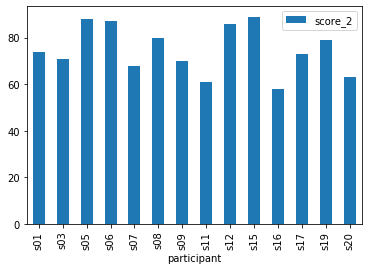

In [42]:
s_scores_2_bar = s_scores_2.plot.bar()

In [43]:
#combine g1 and g2 to one dataframe
s_combo = s_scores_1.append(s_scores_2)

/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [44]:
'''s_combo = pd.DataFrame({'participant':['s01', 's01', 's03', 's03','s05', 's05'
                              's06', 's06','s07','s07','s08','s08','s09','s09', 's11', 's11', 's12', 's12', 's15', 's15', 's16', 's16', 's17', 's17', 's19', 's19', 's20', 's20'], 'score':
     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,
      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,
      s09_p1_g1_score, s09_p1_g2_score, s11_p1_g1_score, s11_p1_g2_score, s12_p1_g1_score, s12_p1_g2_score, s15_p1_g1_score, s15_p1_g2_score, s16_p1_g1_score, s16_p1_g2_score, s17_p1_g1_score, s17_p1_g2_score, s19_p1_g1_score, s19_p1_g2_score, s20_p1_g1_score, s20_p1_g2_score]})
s_combo.set_index('participant', inplace=True, drop=True)'''

"s_combo = pd.DataFrame({'participant':['s01', 's01', 's03', 's03','s05', 's05'\n                              's06', 's06','s07','s07','s08','s08','s09','s09', 's11', 's11', 's12', 's12', 's15', 's15', 's16', 's16', 's17', 's17', 's19', 's19', 's20', 's20'], 'score':\n     [s01_p1_g1_score, s01_p1_g2_score, s02_p1_g1_score, s03_p1_g1_score, s03_p1_g2_score, s05_p1_g1_score,\n      s05_p1_g2_score,s06_p1_g1_score,s06_p1_g2_score, s07_p1_g1_score,s07_p1_g2_score, s08_p1_g1_score,s08_p1_g2_score,\n      s09_p1_g1_score, s09_p1_g2_score, s11_p1_g1_score, s11_p1_g2_score, s12_p1_g1_score, s12_p1_g2_score, s15_p1_g1_score, s15_p1_g2_score, s16_p1_g1_score, s16_p1_g2_score, s17_p1_g1_score, s17_p1_g2_score, s19_p1_g1_score, s19_p1_g2_score, s20_p1_g1_score, s20_p1_g2_score]})\ns_combo.set_index('participant', inplace=True, drop=True)"

In [45]:

#new_index = ('s01_g1','s01_g2','s02_g1','s03_g1','s03_g2','s05_g1','s05_g2', 
                               #'s06_g1','s06_g2','s07_g1','s07_g2','s08_g1','s08_g2','s09_g1','s09_g2')
#s_combo.index = new_index

In [46]:
s_combo = s_combo.sort_values(by=['participant'])

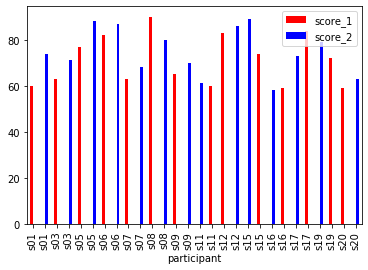

In [47]:
#unnecessary graph
#need to make g1 and g2 bars diff colors
colors = list(islice(cycle(['red','blue','red', 'red','blue','red','blue','red','blue','red','blue','red','blue','red','blue']),None,len(s_combo)))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
s_combo_bar = s_combo.plot(kind='bar',color=colors)

In [48]:
s_scores_1_mean = s_scores_1.mean()

In [49]:
s_scores_1_mean

score_1    70.785714
dtype: float64

In [50]:
s_scores_1_std = s_scores_1.std()

In [51]:
s_scores_1_std

score_1    10.864045
dtype: float64

In [52]:
s_scores_2_mean = s_scores_2.mean()

In [53]:
s_scores_2_mean

score_2    74.785714
dtype: float64

In [54]:
s_scores_2_std = s_scores_2.std()

In [55]:
s_scores_2_std

score_2    10.356555
dtype: float64

In [56]:
s_scores_med = s_scores.median()
s_scores_med

Game 1    68.5
Game 2    73.5
dtype: float64

# Single choice probabilities

In [57]:
s01_p1_g1, s01_p1_g2 = separate_df(s01, 's')

/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [58]:
s01_p1_g2

,game number,trial,player,arm,probability,P1 score,P2 score
240,2,21,1,2,90,14,18
242,2,22,1,3,30,15,19
244,2,23,1,3,30,16,20
246,2,24,1,3,30,16,21
248,2,25,1,2,90,17,22
...,...,...,...,...,...,...,...
390,2,96,1,2,90,70,88
392,2,97,1,2,90,71,89
394,2,98,1,3,30,72,90
396,2,99,1,1,60,73,91


In [59]:
s01_p1_g1, s01_p1_g2 = separate_df(s01, 's')
s03_p1_g1, s03_p1_g2 = separate_df(s03, 's')
s05_p1_g1, s05_p1_g2 = separate_df(s05, 's')
s06_p1_g1, s06_p1_g2 = separate_df(s06, 's')
s07_p1_g1, s07_p1_g2 = separate_df(s07, 's')
s08_p1_g1, s08_p1_g2 = separate_df(s08, 's')
s09_p1_g1, s09_p1_g2 = separate_df(s09, 's')
s11_p1_g1, s11_p1_g2 = separate_df(s11, 's')
s12_p1_g1, s12_p1_g2 = separate_df(s12, 's')
s15_p1_g1, s15_p1_g2 = separate_df(s15, 's')
s16_p1_g1, s16_p1_g2 = separate_df(s16, 's')
s17_p1_g1, s17_p1_g2 = separate_df(s17, 's')
s19_p1_g1, s19_p1_g2 = separate_df(s19, 's')
s20_p1_g1, s20_p1_g2 = separate_df(s20, 's')

/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [60]:
s01_p1_g1_count = s01_p1_g1['probability'].value_counts(sort=False)
s01_p1_g2_count = s01_p1_g2['probability'].value_counts(sort=False)
s03_p1_g1_count = s03_p1_g1['probability'].value_counts(sort=False)
s03_p1_g2_count = s03_p1_g2['probability'].value_counts(sort=False)
s05_p1_g1_count = s05_p1_g1['probability'].value_counts(sort=False)
s05_p1_g2_count = s05_p1_g2['probability'].value_counts(sort=False)
s06_p1_g1_count = s06_p1_g1['probability'].value_counts(sort=False)
s06_p1_g2_count = s06_p1_g2['probability'].value_counts(sort=False)
s07_p1_g1_count = s07_p1_g1['probability'].value_counts(sort=False)
s07_p1_g2_count = s07_p1_g2['probability'].value_counts(sort=False)
s08_p1_g1_count = s08_p1_g1['probability'].value_counts(sort=False)
s08_p1_g2_count = s08_p1_g2['probability'].value_counts(sort=False)
s09_p1_g1_count = s09_p1_g1['probability'].value_counts(sort=False)
s09_p1_g2_count = s09_p1_g2['probability'].value_counts(sort=False)
s11_p1_g1_count = s11_p1_g1['probability'].value_counts(sort=False)
s11_p1_g2_count = s11_p1_g2['probability'].value_counts(sort=False)
s12_p1_g1_count = s12_p1_g1['probability'].value_counts(sort=False)
s12_p1_g2_count = s12_p1_g2['probability'].value_counts(sort=False)
s15_p1_g1_count = s15_p1_g1['probability'].value_counts(sort=False)
s15_p1_g2_count = s15_p1_g2['probability'].value_counts(sort=False)
s16_p1_g1_count = s16_p1_g1['probability'].value_counts(sort=False)
s16_p1_g2_count = s16_p1_g2['probability'].value_counts(sort=False)
s17_p1_g1_count = s17_p1_g1['probability'].value_counts(sort=False)
s17_p1_g2_count = s17_p1_g2['probability'].value_counts(sort=False)
s19_p1_g1_count = s19_p1_g1['probability'].value_counts(sort=False)
s19_p1_g2_count = s19_p1_g2['probability'].value_counts(sort=False)
s20_p1_g1_count = s20_p1_g1['probability'].value_counts(sort=False)
s20_p1_g2_count = s20_p1_g2['probability'].value_counts(sort=False)

In [61]:
#to see each individual count of probabilities, print: 
#s01_p1_g1_count

# Single choices in G1 

In [62]:
s_g1_counts = pd.DataFrame([s01_p1_g1_count, s03_p1_g1_count, s05_p1_g1_count, s06_p1_g1_count, s07_p1_g1_count, 
                s08_p1_g1_count, s09_p1_g1_count, s11_p1_g1_count, s12_p1_g1_count, s15_p1_g1_count, s16_p1_g1_count,
                    s17_p1_g1_count, s19_p1_g1_count, s20_p1_g1_count],
                          index=['s01_p1_g1_count', 's03_p1_g1_count', 
                            's05_p1_g1_count', 's06_p1_g1_count', 's07_p1_g1_count', 's08_p1_g1_count', 
                                 's09_p1_g1_count', 's11_p1_g1_count', 's12_p1_g1_count', 's15_p1_g1_count', 
                                 's16_p1_g1_count','s17_p1_g1_count', 's19_p1_g1_count', 's20_p1_g1_count'])

In [63]:
#How to prevent NaN: df = df.fillna(0)
s_g1_counts = s_g1_counts.fillna(0)

#print
s_g1_counts

,30,60,90
s01_p1_g1_count,31.0,33.0,16.0
s03_p1_g1_count,21.0,31.0,28.0
s05_p1_g1_count,10.0,35.0,35.0
s06_p1_g1_count,11.0,12.0,57.0
s07_p1_g1_count,18.0,22.0,40.0
s08_p1_g1_count,1.0,6.0,73.0
s09_p1_g1_count,13.0,28.0,39.0
s11_p1_g1_count,23.0,28.0,29.0
s12_p1_g1_count,2.0,24.0,54.0
s15_p1_g1_count,5.0,11.0,64.0


In [64]:
s_g1_counts.sum(axis=1)

s01_p1_g1_count    80.0
s03_p1_g1_count    80.0
s05_p1_g1_count    80.0
s06_p1_g1_count    80.0
s07_p1_g1_count    80.0
s08_p1_g1_count    80.0
s09_p1_g1_count    80.0
s11_p1_g1_count    80.0
s12_p1_g1_count    80.0
s15_p1_g1_count    80.0
s16_p1_g1_count    80.0
s17_p1_g1_count    80.0
s19_p1_g1_count    80.0
s20_p1_g1_count    80.0
dtype: float64

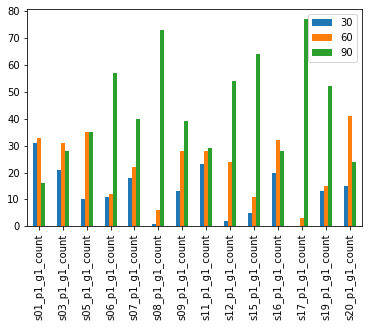

In [65]:
s_g1_counts_bar = s_g1_counts.plot.bar()

# save as jpeg
s_g1_counts_bar.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

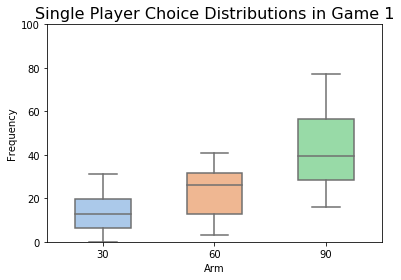

In [66]:
s_g1_counts_box = sns.boxplot( 
                 data=s_g1_counts, 
                 width=0.5,
                 palette="pastel")
s_g1_counts_box.axes.set_title("Single Player Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="s_g1_counts_box.jpg"
 
plt.ylim(0, 100)
s_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
s_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [67]:
#0 is low (30), 1 is med (60), 2 is high (90)
s_g1_low = np.mean(s_g1_counts.iloc[:,0])
s_g1_med = np.mean(s_g1_counts.iloc[:,1])
s_g1_high = np.mean(s_g1_counts.iloc[:,2])

In [68]:
s_g1_low

13.071428571428571

In [69]:
s_g1_med

22.928571428571427

In [70]:
s_g1_high

44.0

In [71]:
s_g1_low_std = np.std(s_g1_counts.iloc[:,0])
s_g1_med_std = np.std(s_g1_counts.iloc[:,1])
s_g1_high_std = np.std(s_g1_counts.iloc[:,2])

In [72]:
s_g1_low_std

8.770602566970819

In [73]:
s_g1_med_std

11.285036145991137

In [74]:
s_g1_high_std

18.33419911375616

# Single choices in G2

In [75]:
s_g2_counts = pd.DataFrame([s01_p1_g2_count, s03_p1_g2_count, 
                            s05_p1_g2_count, s06_p1_g2_count, s07_p1_g2_count, s08_p1_g2_count, s09_p1_g2_count,
                            s11_p1_g2_count, s12_p1_g2_count, s15_p1_g2_count, s16_p1_g2_count,
                    s17_p1_g2_count, s19_p1_g2_count, s20_p1_g2_count],
index= ['s01_p1_g2_count', 's03_p1_g2_count', 's05_p1_g2_count', 's06_p1_g2_count',
                                 's07_p1_g2_count', 's08_p1_g2_count', 's09_p1_g2_count', 's11_p1_g2_count', 
                                 's12_p1_g2_count', 's15_p1_g2_count', 's16_p1_g2_count','s17_p1_g2_count', 
                                 's19_p1_g2_count', 's20_p1_g2_count'])

In [76]:
#How to prevent NaN: df = df.fillna(0)
s_g2_counts = s_g2_counts.fillna(0)

#print
s_g2_counts

,30,60,90
s01_p1_g2_count,31.0,13.0,36.0
s03_p1_g2_count,20.0,21.0,39.0
s05_p1_g2_count,0.0,0.0,80.0
s06_p1_g2_count,0.0,6.0,74.0
s07_p1_g2_count,13.0,22.0,45.0
s08_p1_g2_count,6.0,11.0,63.0
s09_p1_g2_count,8.0,31.0,41.0
s11_p1_g2_count,22.0,23.0,35.0
s12_p1_g2_count,4.0,4.0,72.0
s15_p1_g2_count,2.0,7.0,71.0


In [77]:
s_g2_counts

,30,60,90
s01_p1_g2_count,31.0,13.0,36.0
s03_p1_g2_count,20.0,21.0,39.0
s05_p1_g2_count,0.0,0.0,80.0
s06_p1_g2_count,0.0,6.0,74.0
s07_p1_g2_count,13.0,22.0,45.0
s08_p1_g2_count,6.0,11.0,63.0
s09_p1_g2_count,8.0,31.0,41.0
s11_p1_g2_count,22.0,23.0,35.0
s12_p1_g2_count,4.0,4.0,72.0
s15_p1_g2_count,2.0,7.0,71.0


In [78]:
s_g2_counts.sum(axis=1)

s01_p1_g2_count    80.0
s03_p1_g2_count    80.0
s05_p1_g2_count    80.0
s06_p1_g2_count    80.0
s07_p1_g2_count    80.0
s08_p1_g2_count    80.0
s09_p1_g2_count    80.0
s11_p1_g2_count    80.0
s12_p1_g2_count    80.0
s15_p1_g2_count    80.0
s16_p1_g2_count    80.0
s17_p1_g2_count    80.0
s19_p1_g2_count    80.0
s20_p1_g2_count    80.0
dtype: float64

In [79]:
s15_p1_g1

,game number,trial,player,arm,probability,P1 score,P2 score
42,1,22,1,2,90,12,19
44,1,23,1,2,90,13,20
46,1,24,1,2,90,14,21
48,1,25,1,2,90,15,22
50,1,26,1,2,90,15,23
...,...,...,...,...,...,...,...
192,1,97,1,1,30,71,86
194,1,98,1,2,90,71,87
196,1,99,1,2,90,72,88
198,1,100,1,2,90,73,89


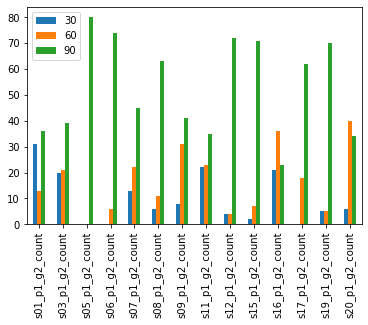

In [80]:
s_g2_counts_bar = s_g2_counts.plot.bar()

# save as jpeg
s_g2_counts_bar.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

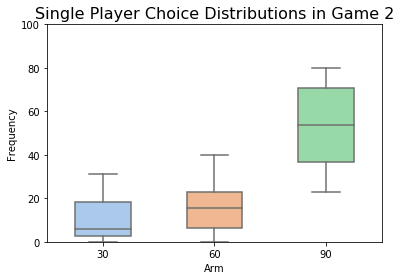

In [81]:
s_g2_counts_box = sns.boxplot( 
                 data=s_g2_counts, 
                 width=0.5,
                 palette="pastel")
s_g2_counts_box.axes.set_title("Single Player Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="s_g2_counts_box.jpg"
 
plt.ylim(0, 100)
s_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
s_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [82]:
s_g2_low = np.mean(s_g2_counts.iloc[:,0])
s_g2_med = np.mean(s_g2_counts.iloc[:,1])
s_g2_high = np.mean(s_g2_counts.iloc[:,2])

In [83]:
s_g2_low

9.857142857142858

In [84]:
s_g2_med

16.928571428571427

In [85]:
s_g2_high

53.214285714285715

In [86]:
s_g2_low_std = np.std(s_g2_counts.iloc[:,0])
s_g2_med_std = np.std(s_g2_counts.iloc[:,1])
s_g2_high_std = np.std(s_g2_counts.iloc[:,2])

In [87]:
s_g2_low_std

9.54580792702178

In [88]:
s_g2_med_std

12.068046863599793

In [89]:
s_g2_high_std

18.131182970737658

# Single arrays

In [90]:
#pip install researchpy

In [91]:
import researchpy as rp

In [92]:
s_90_1 = np.array(s_g1_counts.iloc[:,2])
s_90_2 = np.array(s_g2_counts.iloc[:,2])

In [93]:
s_90_1

array([16., 28., 35., 57., 40., 73., 39., 29., 54., 64., 28., 77., 52.,
       24.])

In [94]:
s_90_2

array([36., 39., 80., 74., 45., 63., 41., 35., 72., 71., 23., 62., 70.,
       34.])

In [95]:
s_60_1 = np.array(s_g1_counts.iloc[:,1])
s_60_2 = np.array(s_g2_counts.iloc[:,1])

In [96]:
s_60_1

array([33., 31., 35., 12., 22.,  6., 28., 28., 24., 11., 32.,  3., 15.,
       41.])

In [97]:
s_60_2

array([13., 21.,  0.,  6., 22., 11., 31., 23.,  4.,  7., 36., 18.,  5.,
       40.])

In [98]:
s_30_1 = np.array(s_g1_counts.iloc[:,0])
s_30_2 = np.array(s_g2_counts.iloc[:,0])

In [99]:
s_30_1

array([31., 21., 10., 11., 18.,  1., 13., 23.,  2.,  5., 20.,  0., 13.,
       15.])

In [100]:
s_30_2

array([31., 20.,  0.,  0., 13.,  6.,  8., 22.,  4.,  2., 21.,  0.,  5.,
        6.])

# Single choice statistics

In [101]:
s_90_p = sp.stats.ttest_rel(s_90_1,s_90_2)
s_60_p = sp.stats.ttest_rel(s_60_1,s_60_2)
s_30_p = sp.stats.ttest_rel(s_30_1,s_30_2)

In [102]:
s_90_p

Ttest_relResult(statistic=-2.325086544268558, pvalue=0.03689858374626218)

In [103]:
s_60_p

Ttest_relResult(statistic=1.7773893286103786, pvalue=0.0988923686308568)

In [104]:
s_30_p

Ttest_relResult(statistic=2.4535473928692655, pvalue=0.029018874994388762)

# Confederate Player Analysis

In [105]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c02_gamedata.csv')
c02 = df
c02_p1_g1_score,c02_p1_g2_score,c02_score_diff = call_get_score(c02, 'c')
c02.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,60,15,18
41,1,21,2,1,90,15,19
42,1,22,1,1,90,16,19
43,1,22,2,1,90,16,20
44,1,23,1,3,60,16,20


In [106]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c03_gamedata.csv')
c03 = df
c03_p1_g1_score,c03_p1_g2_score,c03_score_diff = call_get_score(c03, 'c')
c03.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,90,11,6
41,1,21,2,3,30,11,6
42,1,22,1,3,90,12,6
43,1,22,2,3,30,12,7
44,1,23,1,3,90,13,7


In [107]:
#in the s files, p2 is the confederate
#df = organize_trial_by_trial('data/c04_gamedata.csv')
#c04 = df
#c04_p1_g1_score,c04_p1_g2_score,c04_score_diff = call_get_score(c04, 'c')
#c04.head()

In [108]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c05_gamedata.csv')
c05 = df
c05_p1_g1_score,c05_p1_g2_score,c05_score_diff = call_get_score(c05, 'c')
c05.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,90,13,6
41,1,21,2,3,30,13,7
42,1,22,1,1,30,13,7
43,1,22,2,3,30,13,7
44,1,23,1,2,60,14,7


In [109]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c06_gamedata.csv')
c06 = df
c06_p1_g1_score,c06_p1_g2_score,c06_score_diff = call_get_score(c06, 'c')
c06.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,90,12,4
41,1,21,2,3,30,12,4
42,1,22,1,2,90,13,4
43,1,22,2,3,30,13,5
44,1,23,1,3,60,13,5


In [110]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c09_gamedata.csv')
c09 = df
c09_p1_g1_score,c09_p1_g2_score,c09_score_diff = call_get_score(c09, 'c')
c09.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,60,15,16
41,1,21,2,1,90,15,17
42,1,22,1,1,90,16,17
43,1,22,2,1,90,16,18
44,1,23,1,3,60,17,18


In [111]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c10_gamedata.csv')
c10 = df
c10_p1_g1_score,c10_p1_g2_score,c10_score_diff = call_get_score(c10, 'c')
c10.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,30,13,20
41,1,21,2,1,90,13,21
42,1,22,1,1,90,14,21
43,1,22,2,1,90,14,22
44,1,23,1,1,90,15,22


In [112]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial('data/c11_gamedata.csv')
c11 = df
c11_p1_g1_score,c11_p1_g2_score,c11_score_diff = call_get_score(c11, 'c')
c11.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,60,10,10
41,1,21,2,2,60,10,11
42,1,22,1,3,30,10,11
43,1,22,2,2,60,10,11
44,1,23,1,1,60,11,11


In [113]:
pd.set_option('display.max_columns', None)  

In [114]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/c12_gamedata.csv')
c12 = df
c12_p1_g1_score,c12_p1_g2_score,c12_score_diff = call_get_score(c12, 'c')
c12.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,0,90,14,14
42,1,42,1,2,60,14,15
43,1,43,2,0,90,15,15
44,1,44,1,2,60,15,16
45,1,45,2,0,90,16,16


In [115]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/c13_gamedata.csv')
c13 = df
c13_p1_g1_score,c13_p1_g2_score,c13_score_diff = call_get_score(c13, 'c')
c13.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,0,60,10,16
42,1,42,1,3,30,10,17
43,1,43,2,0,60,11,17
44,1,44,1,2,60,11,17
45,1,45,2,0,60,11,17


In [116]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/c14_gamedata.csv')
c14 = df
c14_p1_g1_score,c14_p1_g2_score,c14_score_diff = call_get_score(c14, 'c')
c14.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,0,30,11,1
42,1,42,1,1,90,11,1
43,1,43,2,0,30,12,1
44,1,44,1,1,90,12,1
45,1,45,2,0,30,13,1


In [117]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/c16_gamedata.csv')
c16 = df
c16_p1_g1_score,c16_p1_g2_score,c16_score_diff = call_get_score(c16, 'c')
c12.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,0,90,14,14
42,1,42,1,2,60,14,15
43,1,43,2,0,90,15,15
44,1,44,1,2,60,15,16
45,1,45,2,0,90,16,16


In [118]:
#in the s files, p2 is the confederate
df = organize_trial_by_trial_floatclick('data/c17_gamedata.csv')
c17 = df
c17_p1_g1_score,c17_p1_g2_score,c17_score_diff = call_get_score(c17, 'c')
c17.head()#in the s files, p2 is the confederate


,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,0,60,17,9
42,1,42,1,1,90,17,10
43,1,43,2,0,60,18,10
44,1,44,1,1,90,18,10
45,1,45,2,0,60,19,10


# Confederate score difference between G1 and G2

In [119]:
score_diff_confederate = pd.DataFrame({'participant':['c02', 'c03', 
                               'c05', 'c06', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c16', 'c17'], 'score_diff_confederate':
     [c02_score_diff, c03_score_diff,
      c05_score_diff, c06_score_diff, c09_score_diff, c10_score_diff, c11_score_diff, c12_score_diff, c13_score_diff, c14_score_diff, c16_score_diff, c17_score_diff ]})

In [120]:
score_diff_confederate

,participant,score_diff_confederate
0,c02,11
1,c03,-6
2,c05,11
3,c06,-6
4,c09,-17
5,c10,-2
6,c11,13
7,c12,-6
8,c13,4
9,c14,-3


In [121]:
score_diff_confederate_mean = score_diff_confederate['score_diff_confederate'].mean()

In [122]:
#score_diff_ex_mean = score_diff_confederate_ex['score_diff_confederate'].mean()

In [123]:
score_diff_confederate_mean

-0.9166666666666666

In [124]:
#score_diff_ex_mean

# Confederate scores in G1 and G2

In [125]:
#list out all the scores in game 1 by participant
c_scores_1 = pd.DataFrame({'participant':['c02', 'c03', 
                               'c05', 'c06', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c16', 'c17'], 'confederate_score_1':
     [c02_p1_g1_score, c03_p1_g1_score,
      c05_p1_g1_score, c06_p1_g1_score, c09_p1_g1_score, c10_p1_g1_score, c11_p1_g1_score, c12_p1_g1_score, c13_p1_g1_score, c14_p1_g1_score, c16_p1_g1_score, c17_p1_g1_score]})
#to prevent an extra column that numbers each row:
c_scores_1.set_index('participant', inplace=True, drop=True)

#print
c_scores_1

,confederate_score_1
participant,
c02,74
c03,79
c05,61
c06,59
c09,61
c10,81
c11,69
c12,59
c13,64


In [126]:
#list out all the scores in game 2 by participant
c_scores_2 = pd.DataFrame({'participant':['c02', 'c03', 
                              'c05', 'c06', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c16', 'c17'], 'confederate_score_2':[c02_p1_g2_score, c03_p1_g2_score, c05_p1_g2_score, c06_p1_g2_score, c09_p1_g2_score, c10_p1_g2_score, c11_p1_g2_score, c12_p1_g2_score, c13_p1_g2_score, c14_p1_g2_score, c16_p1_g2_score, c17_p1_g2_score]})

#to prevent an extra column that numbers each row:
c_scores_2.set_index('participant', inplace=True, drop=True)
#s_scores_1 = pd.DataFrame(data = d1)
#s_scores_2 = pd.DataFrame(data = d2)

#print
c_scores_2

,confederate_score_2
participant,
c02,85
c03,73
c05,72
c06,53
c09,44
c10,79
c11,82
c12,53
c13,68


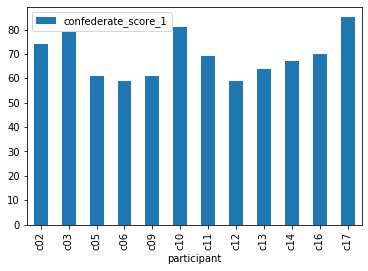

In [127]:
c_scores_1_bar = c_scores_1.plot.bar()

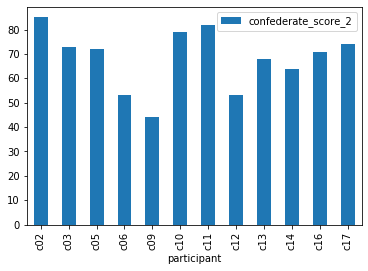

In [128]:
c_scores_2_bar = c_scores_2.plot.bar()

In [129]:
#merge both games by participant:
c_scores = pd.merge(c_scores_1, c_scores_2, on = 'participant')

In [130]:
#label columns
c_scores.columns=['Game 1','Game 2']

In [131]:
c_scores

,Game 1,Game 2
participant,,
c02,74,85
c03,79,73
c05,61,72
c06,59,53
c09,61,44
c10,81,79
c11,69,82
c12,59,53
c13,64,68


([<matplotlib.axis.YTick at 0x1a2504ef10>,
 <a list of 6 Text yticklabel objects>)

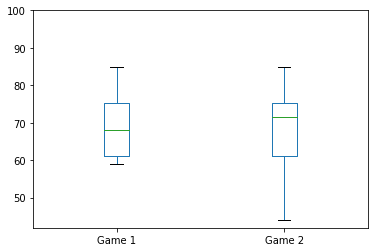

In [132]:
c_scores_box = c_scores.boxplot(labels=['Game 1','Game 2'])
plt.grid(b=None)
plt.yticks(np.arange(50, 105, step=10))

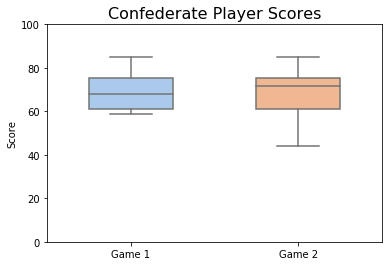

In [133]:
c_scores_box = sns.boxplot( 
                 data=c_scores, 
                 width=0.5,
                 palette="pastel")
c_scores_box.axes.set_title("Confederate Player Scores",
                    fontsize=16)

plot_file_name="c_score_box.jpg"
 
plt.ylim(0, 100)
c_scores_box.axes.set(ylabel='Score')

# save as jpeg
c_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [134]:
c_scores_p = sp.stats.ttest_rel(c_scores['Game 1'],c_scores['Game 2'])

In [135]:
c_scores_p

Ttest_relResult(statistic=0.34188840128339476, pvalue=0.7388773653404721)

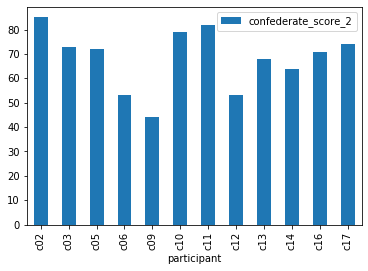

In [136]:
c_scores_2_bar = c_scores_2.plot.bar()

In [137]:
#combine g1 and g2 to one dataframe
c_combo = c_scores_1.append(c_scores_2)

/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [138]:
'''c_combo = pd.DataFrame({'participant':['c02', 'c02', 'c03', 'c03',
                              'c06','c06','c09','c09','c10','c10','c11','c11','c12','c12','c13','c13','c14','c14','c16','c16','c17','c17'], 'score':
     [c02_p1_g1_score, c02_p1_g2_score, c03_p1_g1_score, c03_p1_g2_score, c05_p1_g1_score, c05_p1_g2_score, c06_p1_g1_score, c06_p1_g2_score, c09_p1_g1_score, c09_p1_g2_score, c10_p1_g1_score, c10_p1_g2_score, c11_p1_g1_score, c11_p1_g2_score, c12_p1_g1_score, c12_p1_g2_score, c13_p1_g1_score, c13_p1_g2_score, c14_p1_g1_score, c14_p1_g2_score, c16_p1_g1_score, c16_p1_g2_score, c17_p1_g1_score, c17_p1_g2_score]})
c_combo.set_index('participant', inplace=True, drop=True)'''

"c_combo = pd.DataFrame({'participant':['c02', 'c02', 'c03', 'c03',\n                              'c06','c06','c09','c09','c10','c10','c11','c11','c12','c12','c13','c13','c14','c14','c16','c16','c17','c17'], 'score':\n     [c02_p1_g1_score, c02_p1_g2_score, c03_p1_g1_score, c03_p1_g2_score, c05_p1_g1_score, c05_p1_g2_score, c06_p1_g1_score, c06_p1_g2_score, c09_p1_g1_score, c09_p1_g2_score, c10_p1_g1_score, c10_p1_g2_score, c11_p1_g1_score, c11_p1_g2_score, c12_p1_g1_score, c12_p1_g2_score, c13_p1_g1_score, c13_p1_g2_score, c14_p1_g1_score, c14_p1_g2_score, c16_p1_g1_score, c16_p1_g2_score, c17_p1_g1_score, c17_p1_g2_score]})\nc_combo.set_index('participant', inplace=True, drop=True)"

In [139]:
#new_index = ('c02_g1','c02_g2','c03_g1','c03_g2','c04_g1','c04_g2','c05_g1','c05_g2','c06_g1','c06_g2','c09_g1','c09_g2','c10_g1','c10_g2','c11_g1','c11_g2','c12_g1','c12_g2','c13_g1','c13_g2','c14_g1','c14_g2','c16_g1','c16_g2','c17_g1','c17_g2')
#c_combo.index = new_index

In [140]:
c_combo = c_combo.sort_values(by=['participant'])

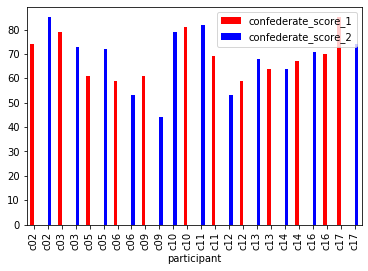

In [141]:
#unnecessary graph
#need to make g1 and g2 bars diff colors
colors = list(islice(cycle(['red','blue','red', 'red','blue','red','blue','red','blue','red','blue','red','blue','red','blue']),None,len(c_combo)))
#my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
c_combo_bar = c_combo.plot(kind='bar',color=colors)

In [142]:
c_scores_1_mean = c_scores_1.mean()

In [143]:
c_scores_1_mean

confederate_score_1    69.083333
dtype: float64

In [144]:
c_scores_1_std = c_scores_1.std()

In [145]:
c_scores_1_std

confederate_score_1    8.959082
dtype: float64

In [146]:
c_scores_2_mean = c_scores_2.mean()

In [147]:
c_scores_2_mean

confederate_score_2    68.166667
dtype: float64

In [148]:
c_scores_2_std = c_scores_2.std()

In [149]:
c_scores_2_std

confederate_score_2    12.554125
dtype: float64

In [150]:
c_scores_med = c_scores.median()
c_scores_med

Game 1    68.0
Game 2    71.5
dtype: float64

# Confederate choice probabilities

In [151]:
#s01_p1_g1, s01_p1_g2 = separate_df(s01, 's')
c02_p1_g1, c02_p1_g2 = separate_df(c02, 'c')
c03_p1_g1, c03_p1_g2 = separate_df(c03, 'c')
c05_p1_g1, c05_p1_g2 = separate_df(c05, 'c')
c06_p1_g1, c06_p1_g2 = separate_df(c06, 'c')
c09_p1_g1, c09_p1_g2 = separate_df(c09, 'c')
c10_p1_g1, c10_p1_g2 = separate_df(c10, 'c')
c11_p1_g1, c11_p1_g2 = separate_df(c11, 'c')
c12_p1_g1, c12_p1_g2 = separate_df(c12, 'c')
c13_p1_g1, c13_p1_g2 = separate_df(c13, 'c')
c14_p1_g1, c14_p1_g2 = separate_df(c14, 'c')
c16_p1_g1, c16_p1_g2 = separate_df(c16, 'c')
c17_p1_g1, c17_p1_g2 = separate_df(c17, 'c')

/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [152]:
c02_p1_g1_count = c02_p1_g1['probability'].value_counts(sort=False)
c02_p1_g2_count = c02_p1_g2['probability'].value_counts(sort=False)
c03_p1_g1_count = c03_p1_g1['probability'].value_counts(sort=False)
c03_p1_g2_count = c03_p1_g2['probability'].value_counts(sort=False)
c05_p1_g1_count = c05_p1_g1['probability'].value_counts(sort=False)
c05_p1_g2_count = c05_p1_g2['probability'].value_counts(sort=False)
c06_p1_g1_count = c06_p1_g1['probability'].value_counts(sort=False)
c06_p1_g2_count = c06_p1_g2['probability'].value_counts(sort=False)
c09_p1_g1_count = c09_p1_g1['probability'].value_counts(sort=False)
c09_p1_g2_count = c09_p1_g2['probability'].value_counts(sort=False)
c10_p1_g1_count = c10_p1_g1['probability'].value_counts(sort=False)
c10_p1_g2_count = c10_p1_g2['probability'].value_counts(sort=False)
c11_p1_g1_count = c11_p1_g1['probability'].value_counts(sort=False)
c11_p1_g2_count = c11_p1_g2['probability'].value_counts(sort=False)
c12_p1_g1_count = c12_p1_g1['probability'].value_counts(sort=False)
c12_p1_g2_count = c12_p1_g2['probability'].value_counts(sort=False)
c13_p1_g1_count = c13_p1_g1['probability'].value_counts(sort=False)
c13_p1_g2_count = c13_p1_g2['probability'].value_counts(sort=False)
c14_p1_g1_count = c14_p1_g1['probability'].value_counts(sort=False)
c14_p1_g2_count = c14_p1_g2['probability'].value_counts(sort=False)
c16_p1_g1_count = c16_p1_g1['probability'].value_counts(sort=False)
c16_p1_g2_count = c16_p1_g2['probability'].value_counts(sort=False)
c17_p1_g1_count = c17_p1_g1['probability'].value_counts(sort=False)
c17_p1_g2_count = c17_p1_g2['probability'].value_counts(sort=False)

# Confederate choices in G1

In [153]:
c_g1_counts = pd.DataFrame([c02_p1_g1_count, c03_p1_g1_count,
                            c05_p1_g1_count, c06_p1_g1_count, c09_p1_g1_count, c10_p1_g1_count, c11_p1_g1_count, c12_p1_g1_count, c13_p1_g1_count, c14_p1_g1_count, c16_p1_g1_count, c17_p1_g1_count],
         index=['c02_p1_g1_count', 'c03_p1_g1_count', 'c05_p1_g1_count', 'c06_p1_g1_count', 
                'c09_p1_g1_count', 'c10_p1_g1_count', 'c11_p1_g1_count', 'c12_p1_g1_count', 'c13_p1_g1_count', 'c14_p1_g1_count', 
                'c16_p1_g1_count', 'c17_p1_g1_count'])

In [154]:
#How to prevent NaN: df = df.fillna(0)
c_g1_counts = c_g1_counts.fillna(0)

#print
c_g1_counts

,30,60,90
c02_p1_g1_count,9,36,35
c03_p1_g1_count,3,1,76
c05_p1_g1_count,27,24,29
c06_p1_g1_count,23,24,33
c09_p1_g1_count,23,37,20
c10_p1_g1_count,4,5,71
c11_p1_g1_count,12,30,38
c12_p1_g1_count,27,37,16
c13_p1_g1_count,18,24,38
c14_p1_g1_count,13,15,52


In [388]:
c_g1_counts.sum(axis=1)

c02_p1_g1_count    80
c03_p1_g1_count    80
c05_p1_g1_count    80
c06_p1_g1_count    80
c09_p1_g1_count    80
c10_p1_g1_count    80
c11_p1_g1_count    80
c12_p1_g1_count    80
c13_p1_g1_count    80
c14_p1_g1_count    80
c16_p1_g1_count    80
c17_p1_g1_count    80
dtype: int64

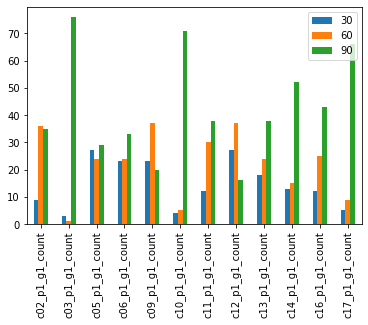

In [155]:
c_g1_counts_bar = c_g1_counts.plot.bar()

# save as jpeg
c_g1_counts_bar.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

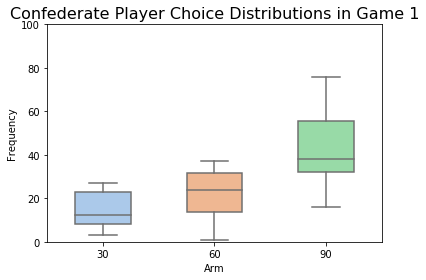

In [156]:
c_g1_counts_box = sns.boxplot( 
                 data=c_g1_counts, 
                 width=0.5,
                 palette="pastel")
c_g1_counts_box.axes.set_title("Confederate Player Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="c_g1_counts_box.jpg"
 
plt.ylim(0, 100)
c_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
c_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [157]:
#0 is low (30), 1 is med (60), 2 is high (90)
c_g1_low = np.mean(c_g1_counts.iloc[:,0])
c_g1_med = np.mean(c_g1_counts.iloc[:,1])
c_g1_high = np.mean(c_g1_counts.iloc[:,2])

In [158]:
c_g1_low

14.666666666666666

In [159]:
c_g1_med

22.25

In [160]:
c_g1_high

43.083333333333336

In [161]:
c_g1_low_std = np.std(c_g1_counts.iloc[:,0])
c_g1_med_std = np.std(c_g1_counts.iloc[:,1])
c_g1_high_std = np.std(c_g1_counts.iloc[:,2])

In [162]:
c_g1_low_std

8.399735445569435

In [163]:
c_g1_med_std

11.825995377416087

In [164]:
c_g1_high_std

18.598648397725633

# Confederate choices in G2

In [165]:
c_g2_counts = pd.DataFrame([c02_p1_g2_count, c03_p1_g2_count,
                            c05_p1_g2_count, c06_p1_g2_count, c09_p1_g2_count, c10_p1_g2_count, c11_p1_g2_count, c12_p1_g2_count, c13_p1_g2_count, c14_p1_g2_count, c16_p1_g2_count, c17_p1_g2_count],
         index=['c02_p1_g2_count', 'c03_p1_g2_count', 'c05_p1_g2_count', 'c06_p1_g2_count', 
                'c09_p1_g2_count', 'c10_p1_g2_count', 'c11_p1_g2_count', 'c12_p1_g2_count', 'c13_p1_g2_count', 'c14_p1_g2_count', 
                'c16_p1_g2_count', 'c17_p1_g2_count'])

In [166]:
#How to prevent NaN: df = df.fillna(0)
c_g2_counts = c_g2_counts.fillna(0)

#print
c_g2_counts

,30,60,90
c02_p1_g2_count,1,8,71
c03_p1_g2_count,2,4,74
c05_p1_g2_count,27,24,29
c06_p1_g2_count,31,27,22
c09_p1_g2_count,37,29,14
c10_p1_g2_count,9,21,50
c11_p1_g2_count,5,19,56
c12_p1_g2_count,32,33,15
c13_p1_g2_count,16,25,39
c14_p1_g2_count,15,25,40


In [389]:
c_g2_counts.sum(axis=1)

c02_p1_g2_count    80
c03_p1_g2_count    80
c05_p1_g2_count    80
c06_p1_g2_count    80
c09_p1_g2_count    80
c10_p1_g2_count    80
c11_p1_g2_count    80
c12_p1_g2_count    80
c13_p1_g2_count    80
c14_p1_g2_count    80
c16_p1_g2_count    80
c17_p1_g2_count    80
dtype: int64

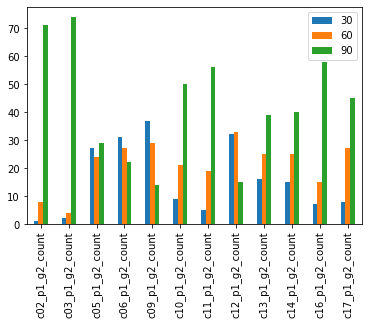

In [167]:
c_g2_counts_bar = c_g2_counts.plot.bar()

# save as jpeg
c_g2_counts_bar.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

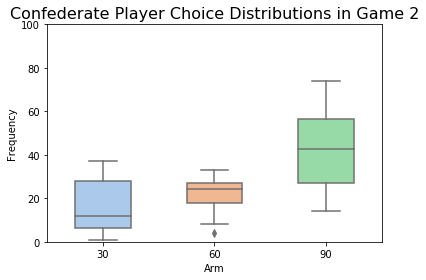

In [168]:
c_g2_counts_box = sns.boxplot( 
                 data=c_g2_counts, 
                 width=0.5,
                 palette="pastel")
c_g2_counts_box.axes.set_title("Confederate Player Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="c_g2_counts_box.jpg"
 
plt.ylim(0, 100)
s=c_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
c_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [169]:
c_g2_low = np.mean(c_g2_counts.iloc[:,0])
c_g2_med = np.mean(c_g2_counts.iloc[:,1])
c_g2_high = np.mean(c_g2_counts.iloc[:,2])

In [170]:
c_g2_low

15.833333333333334

In [171]:
c_g2_med

21.416666666666668

In [172]:
c_g2_high

42.75

In [173]:
c_g2_low_std = np.std(c_g2_counts.iloc[:,0])
c_g2_med_std = np.std(c_g2_counts.iloc[:,1])
c_g2_high_std = np.std(c_g2_counts.iloc[:,2])

In [174]:
c_g2_low_std

12.178076841421042

In [175]:
c_g2_med_std

8.25084170790404

In [176]:
c_g2_high_std 

19.3180614969515

# Confederate arrays

In [177]:
#pip install researchpy

In [178]:
import researchpy as rp

In [179]:
c_90_1 = np.array(c_g1_counts.iloc[:,2])
c_90_2 = np.array(c_g2_counts.iloc[:,2])

In [180]:
c_90_1

array([35, 76, 29, 33, 20, 71, 38, 16, 38, 52, 43, 66])

In [181]:
c_90_2

array([71, 74, 29, 22, 14, 50, 56, 15, 39, 40, 58, 45])

In [182]:
c_60_1 = np.array(c_g1_counts.iloc[:,1])
c_60_2 = np.array(c_g2_counts.iloc[:,1])

In [183]:
c_60_1

array([36,  1, 24, 24, 37,  5, 30, 37, 24, 15, 25,  9])

In [184]:
c_60_2

array([ 8,  4, 24, 27, 29, 21, 19, 33, 25, 25, 15, 27])

In [185]:
c_30_1 = np.array(c_g1_counts.iloc[:,0])
c_30_2 = np.array(c_g2_counts.iloc[:,0])

In [186]:
c_30_1

array([ 9,  3, 27, 23, 23,  4, 12, 27, 18, 13, 12,  5])

In [187]:
c_30_2

array([ 1,  2, 27, 31, 37,  9,  5, 32, 16, 15,  7,  8])

# Confederate choice statistics

In [188]:
c_90_p = sp.stats.ttest_rel(c_90_1,c_90_2)
c_60_p = sp.stats.ttest_rel(c_60_1,c_60_2)
c_30_p = sp.stats.ttest_rel(c_30_1,c_30_2)

In [189]:
c_90_p

Ttest_relResult(statistic=0.0695429920434903, pvalue=0.945805542709439)

In [190]:
c_60_p

Ttest_relResult(statistic=0.22720872180965862, pvalue=0.8244289988185863)

In [191]:
c_30_p

Ttest_relResult(statistic=-0.6321038095862124, pvalue=0.5402343211215399)

In [192]:
#maximizing and matching?

In [193]:
#maximizing and matching?

# Maximizing/Matching CONTROL

In [194]:
#Here we compare the choice distributions to idealized models of two decision-making strategies: 
#matching and maximizing. Matching would be choosing each each hole proportionally to its reward rate, 
#and maximizing would be always choosing the high reward hole.

In [754]:
#JSD: Jensen Shannon Divergence. Measures the similarity between two probability distributions. Taken from 
#https://gist.github.com/zhiyzuo/f80e2b1cfb493a5711330d271a228a3d. *Note: probability distributions need to be
#normalized.'''
#parameters: p and q are the two probability distributions to be compared.

def jsd(p, q, base=np.e):
    
    
    #Implementation of pairwise `jsd` based on https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
    # convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    # normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    m = 1./2*(p + q)
    return sp.stats.entropy(p,m, base=base)/2. +  sp.stats.entropy(q, m, base=base)/2.

In [755]:
#Are ppl using a strategy similar to their partner's? This functions calls jsd for p1 and for p2. *UNFINISHED* 
#DO NOT USE.
#calls jsd for p1 and p2 and for p1 and p2 with the mean
#def compare_strat(p1,p2):
    #strat = jsd(p1,p2)
   # comp_1 = jsd(p1,[j_g1_low,j_g1_med,j_g1_high])
    #comp_2 = jsd(p2,[j_g1_low,j_g1_med,j_g1_high])
    #return strat, comp_1, comp_2

In [756]:
#Idealized probability distributions to use for comparison. You can change these or add more models.

maximize = [0,0,100]
match = [0.3 * 100,0.6 * 100,0.9 * 100]

In [897]:
#This function calls jsd. 
#Input: counts- a player's choice distributions in a particular game (ex. s01_p1_g1_counts)
#Output: maxi- JSD score for the maximizing strategy
        #matchi- JSD score for the matching strategy
def call_jsd(counts):
    maxi = jsd(counts,maximize) #(p, q)
    matchi = jsd(counts,match)
    return maxi,matchi

In [758]:
from scipy import stats

In [633]:
#if same, 0
test = jsd(maximize,maximize)

In [634]:
test

0.0

In [996]:
def check_type(df,*social):
    types = pd.DataFrame(index=['type'])
    for index,row in df.iterrows():
        maxi = row["max"]
        matchi = row["match"]
        print(index,maxi,matchi)
        if maxi < matchi:
            print('maxi')
            types = types.append({'type' : 'maxi'},ignore_index=True)
            #types[index,'type'] = 'max'
            num = maxi
        elif matchi < maxi:
            print('matchi')
            types = types.append({'type' : 'matchi'},ignore_index=True)
            num = matchi
        else:
            types = types.append({'type' : 'neither'},ignore_index=True)
            num = 1
        #if social == True:
          #  if num >= jsd(social_max,social_match):
           #     types = types.append({'type' : 'neither'},ignore_index=True)
      #  else:
     #       if num >= jsd(maximize,match):
     #           types = types.append({'type' : 'neither'},ignore_index=True)
    return types

In [997]:
#Call 'call_jsd' for each participant for each game in the single player sessions.
#with 0, put in actual probabilities in brackets

s01_g1_max,s01_g1_match = call_jsd(s01_p1_g1_count)
s01_g2_max,s01_g2_match = call_jsd(s01_p1_g2_count)
s03_g1_max,s03_g1_match = call_jsd(s03_p1_g1_count)
s03_g2_max,s03_g2_match = call_jsd(s03_p1_g2_count)
s05_g1_max,s05_g1_match = call_jsd([10, 35, 35])
s05_g2_max,s05_g2_match = call_jsd([0, 0, 80])
s06_g1_max,s06_g1_match = call_jsd(s06_p1_g1_count)
s06_g2_max,s06_g2_match = call_jsd(s06_p1_g1_count)
s07_g1_max,s07_g1_match = call_jsd(s07_p1_g1_count)
s07_g2_max,s07_g2_match = call_jsd(s07_p1_g2_count)
s08_g1_max,s08_g1_match = call_jsd(s08_p1_g1_count)
s08_g2_max,s08_g2_match = call_jsd(s08_p1_g2_count)
s09_g1_max,s09_g1_match = call_jsd(s09_p1_g1_count)
s09_g2_max,s09_g2_match = call_jsd(s09_p1_g2_count)
s11_g1_max,s11_g1_match = call_jsd(s11_p1_g1_count)
s11_g2_max,s11_g2_match = call_jsd(s11_p1_g2_count)
s12_g1_max,s12_g1_match = call_jsd(s12_p1_g1_count)
s12_g2_max,s12_g2_match = call_jsd(s12_p1_g2_count)
s15_g1_max,s15_g1_match = call_jsd(s15_p1_g1_count)
s15_g2_max,s15_g2_match = call_jsd(s15_p1_g2_count)
s16_g1_max,s16_g1_match = call_jsd(s16_p1_g1_count)
s16_g2_max,s16_g2_match = call_jsd(s16_p1_g2_count)
s17_g1_max,s17_g1_match = call_jsd([0, 3, 78])
s17_g2_max,s17_g2_match = call_jsd([0, 19, 62])
s19_g1_max,s19_g1_match = call_jsd(s19_p1_g1_count)
s19_g2_max,s19_g2_match = call_jsd(s19_p1_g2_count)
s20_g1_max,s20_g1_match = call_jsd(s20_p1_g1_count)
s20_g2_max,s20_g2_match = call_jsd(s20_p1_g2_count)
c02_g1_max,c02_g1_match = call_jsd(c02_p1_g1_count)
c02_g2_max,c02_g2_match = call_jsd(c02_p1_g2_count)
c03_g1_max,c03_g1_match = call_jsd(c03_p1_g1_count)
c03_g2_max,c03_g2_match = call_jsd(c03_p1_g2_count)
c05_g1_max,c05_g1_match = call_jsd(c05_p1_g1_count)
c05_g2_max,c05_g2_match = call_jsd(c05_p1_g2_count)
c06_g1_max,c06_g1_match = call_jsd(c06_p1_g1_count)
c06_g2_max,c06_g2_match = call_jsd(c06_p1_g1_count)
c09_g1_max,c09_g1_match = call_jsd(c09_p1_g1_count)
c09_g2_max,c09_g2_match = call_jsd(c09_p1_g2_count)
c10_g1_max,c10_g1_match = call_jsd(c10_p1_g1_count)
c10_g2_max,c10_g2_match = call_jsd(c10_p1_g2_count)
c11_g1_max,c11_g1_match = call_jsd(c11_p1_g1_count)
c11_g2_max,c11_g2_match = call_jsd(c11_p1_g2_count)
c12_g1_max,c12_g1_match = call_jsd(c12_p1_g1_count)
c12_g2_max,c12_g2_match = call_jsd(c12_p1_g2_count)
c13_g1_max,c13_g1_match = call_jsd(c13_p1_g1_count)
c13_g2_max,c13_g2_match = call_jsd(c13_p1_g2_count)
c14_g1_max,c14_g1_match = call_jsd(c14_p1_g1_count)
c14_g2_max,c14_g2_match = call_jsd(c14_p1_g2_count)
c16_g1_max,c16_g1_match = call_jsd(c16_p1_g1_count)
c16_g2_max,c16_g2_match = call_jsd(c16_p1_g2_count)
c17_g1_max,c17_g1_match = call_jsd(c17_p1_g2_count)
c17_g2_max,c17_g2_match = call_jsd(c17_p1_g2_count)

In [1023]:
#Create a dataframe for single player game 1 jsd scores, with a column for each strategy.'''
control_jsd_g1 = pd.DataFrame({'max':[s01_g1_max,s03_g1_max,s05_g1_max,s06_g1_max,s07_g1_max,s08_g1_max,
                                s09_g1_max, s11_g1_max, s12_g1_max, s15_g1_max, s16_g1_max, s17_g1_max, 
                                      s19_g1_max, s20_g1_max, c02_g1_max, c03_g1_max, c05_g1_max, c06_g1_max, 
                                      c09_g1_max, c10_g1_max, c11_g1_max, c12_g1_max, c13_g1_max, c14_g1_max, 
                                      c16_g1_max, c17_g1_max],
                      'match':[s01_g1_match,s03_g1_match,s05_g1_match
                               ,s06_g1_match,s07_g1_match,s08_g1_match,s09_g1_match, s11_g1_match, 
                               s12_g1_match, s15_g1_match, s16_g1_match, s17_g1_match, s19_g1_match, 
                               s20_g1_match, c02_g1_match, c03_g1_match, c05_g1_match, c06_g1_match, 
                                      c09_g1_match, c10_g1_match, c11_g1_match, c12_g1_match, c13_g1_match, c14_g1_match, 
                                      c16_g1_match, c17_g1_match]},
                        index=['s01', 's03','s05','s06','s07','s08','s09', 's11', 's12', 's15', 's16', 's17', 's19', 's20', 'c02', 'c03', 
                               'c05', 'c06', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c16', 'c17'])

In [1024]:
#closer to 0 = closer to that pure strategy
control_jsd_g1

,max,match
s01,0.422810,0.057935
s03,0.306858,0.013066
s05,0.251473,0.006066
s06,0.111764,0.027887
s07,0.215762,0.003581
s08,0.031326,0.114133
s09,0.222681,0.000154
s11,0.298502,0.013740
s12,0.128502,0.036298
s15,0.074882,0.050743


In [1025]:
control_types_g1 = check_type(control_jsd_g1)

s01 0.4228104552401625 0.05793497802605691
matchi
s03 0.30685770886869845 0.013066262687201166
matchi
s05 0.25147291908660935 0.006065572177275203
matchi
s06 0.11176384432261273 0.027887066868293203
matchi
s07 0.21576155433883565 0.0035806405380672274
matchi
s08 0.03132635558932316 0.11413280790109231
maxi
s09 0.2226805511392874 0.00015438011922897562
matchi
s11 0.2985021223133303 0.013739848858351396
matchi
s12 0.1285017811534404 0.036297814628286226
matchi
s15 0.07488176162235435 0.050742573784394646
matchi
s16 0.30685770886869845 0.012364573934208152
matchi
s17 0.01301077227129638 0.1631863373713105
maxi
s19 0.14000312030209408 0.015264545135666323
matchi
s20 0.3420144880071857 0.022500273092127328
matchi
c02 0.25147291908660935 0.008046842524875246
matchi
c03 0.01764922746459481 0.15053999622640551
maxi
c05 0.29850212231333034 0.020704224520601024
matchi
c06 0.2665975354837572 0.010674316936154608
matchi
c09 0.38039566584857787 0.03463638032744253
matchi
c10 0.04066684733988505 0.0

In [1026]:
control_types_g1.drop([0])

,type
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,maxi
7,matchi
8,matchi
9,matchi
10,matchi


In [1027]:
#Create a dataframe for single player game 2 jsd scores, with a column for each strategy.'''
control_jsd_g2 = pd.DataFrame({'max':[s01_g2_max,s03_g2_max,s05_g2_max,s06_g2_max,s07_g2_max,s08_g2_max,
                                s09_g2_max, s11_g2_max, s12_g2_max, s15_g2_max, s16_g2_max, s17_g2_max, 
                                s19_g2_max, s20_g2_max, c02_g2_max, c03_g2_max, c05_g2_max, c06_g2_max, 
                                      c09_g2_max, c10_g2_max, c11_g2_max, c12_g2_max, c13_g2_max, c14_g2_max, 
                                      c16_g2_max, c17_g2_max],
                      'match':[s01_g2_match,s03_g2_match,s05_g2_match
                               ,s06_g2_match,s07_g2_match,s08_g2_match,s09_g2_match, s11_g2_match,
                               s12_g2_match, s15_g2_match, s16_g2_match, s17_g2_match, s19_g2_match, 
                               s20_g2_match, c02_g2_match, c03_g1_match, c05_g1_match, c06_g1_match, 
                                      c09_g2_match, c10_g2_match, c11_g2_match, c12_g2_match, c13_g2_match, c14_g2_match, 
                                      c16_g2_match, c17_g2_match]},
                        index=['s01', 's03','s05','s06','s07','s08','s09', 's11', 's12', 's15', 's16', 's17', 's19', 's20', 'c02', 'c03', 
                               'c05', 'c06', 'c09', 'c10', 'c11', 'c12', 'c13', 'c14', 'c16', 'c17'])

In [1028]:
control_jsd_g2

,max,match
s01,0.244099,0.038302
s03,0.222681,0.006345
s05,0.000000,0.215762
s06,0.111764,0.027887
s07,0.182664,0.002333
s08,0.079977,0.046095
s09,0.208947,0.005268
s11,0.251473,0.008600
s12,0.035974,0.104180
s15,0.040667,0.095024


In [1029]:
control_types_g2 = check_type(control_jsd_g2)

s01 0.24409937049739652 0.03830179416132133
matchi
s03 0.2226805511392874 0.006344630069615257
matchi
s05 0.0 0.21576155433883565
maxi
s06 0.11176384432261273 0.027887066868293203
matchi
s07 0.18266421587736578 0.002333387236177131
matchi
s08 0.07997740811875988 0.046095039729779796
matchi
s09 0.20894673988232954 0.005268315267937668
matchi
s11 0.25147291908660935 0.008600477585073187
matchi
s12 0.03597375665014844 0.10417976706957574
maxi
s15 0.04066684733988505 0.09502416342042012
maxi
s16 0.3512810052638733 0.02427002750921893
matchi
s17 0.08910971928893588 0.07610123437377296
matchi
s19 0.04540657807824091 0.0890392632562732
maxi
s20 0.25897071489674234 0.01882572036482019
matchi
c02 0.04066684733988505 0.09998253579695018
maxi
c03 0.026723723680696504 0.15053999622640551
maxi
c05 0.29850212231333034 0.020704224520601024
matchi
c06 0.2665975354837572 0.010674316936154608
matchi
c09 0.4458923296545939 0.07728358132772647
matchi
c10 0.15179594609802105 0.00823380300913832
matchi
c11 

In [1030]:
control_types_g2.drop([0])

,type
1,matchi
2,matchi
3,maxi
4,matchi
5,matchi
6,matchi
7,matchi
8,matchi
9,maxi
10,maxi


In [1031]:
#how different max and match dists are from eachother
#neither max or match(?)
threshold = jsd(maximize,match)

In [1032]:
maximize

[0, 0, 100]

In [1033]:
match

[30.0, 60.0, 90.0]

In [1034]:
jsd(maximize, match)

0.21576155433883565

In [1035]:
threshold

0.21576155433883565

In [1036]:
import matplotlib.lines as mlines

In [1037]:
#colors_jsd = [['lightcoral','red','lightcoral','red','bisque','orange','bisque','orange','palegreen','green','palegreen','green',
              #'lightblue','blue','lightblue','blue','mediumslateblue','indigo','mediumslateblue','indigo','lightpink','deeppink',
              #'lightpink','deeppink','yellow','gold','yellow','gold','lightgray','gray','lightgray','gray']              

In [1038]:
import itertools

In [1039]:
#Here I print the means of the JSD values in each condition, just to see what they are.'''

In [1015]:
#run t test to see sig between max and match per game
#put in box plot
control_jsd_g1.mean()

max      0.212394
match    0.035942
dtype: float64

In [1016]:
control_jsd_g2.mean()

max      0.178156
match    0.047978
dtype: float64

In [1017]:
import matplotlib.patches as mpatches

In [1018]:
#,'orange','green','blue','pink','purple','peru','cyan','red','lightcoral','orange','darkorange','green','palegreen','blue', 'peru','cyan', 'red','lightcoral', 'orange','darkorange','green','palegreen','blue','palegreen','blue']

In [1045]:
#Here I think I tried to create colors for each subject in each condition for use in graphs. I DON'T think this is 
#a good way to do this.'''
#colors_jsd_j = ['red','lightcoral','orange','darkorange','green','orange',
             # 'blue','darkblue','hotblue','blue','purple','plum','peru','saddlebrown','gray','lightgray']
colors_jsd_control_g1 = ['orange','orange','orange','orange','orange','blue','orange','orange','orange','orange',
                         'orange','blue','orange','orange',
              'orange', 'blue','orange', 'orange','orange', 'blue','orange','orange','orange','orange','orange','orange']


colors_jsd_control_g2 = ['orange','orange','blue','orange','orange','orange','orange','orange','blue','blue',
                         'orange','orange','blue','orange',
              'blue', 'blue','orange', 'orange','orange', 'orange','orange','orange','orange','orange','orange','orange']




#markers_jsd = ['o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v'
       #   'o','v','o','v','o','v','o','v']
colors

['red',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue']

# Graphs

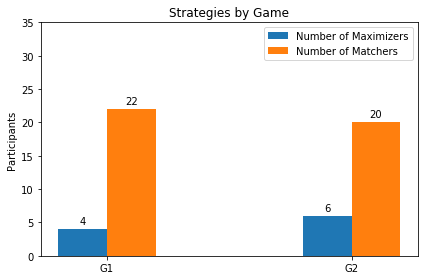

In [1046]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2']
max_counts = [4, 6]
match_counts = [22, 20]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, max_counts, width, label='Number of Maximizers')
rects2 = ax.bar(x + width/2, match_counts, width, label='Number of Matchers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Participants')
ax.set_title('Strategies by Game')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.ylim(0, 35)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [1042]:
#Here I try to plot the JSD Values. Continued below under 'JSD with gender.

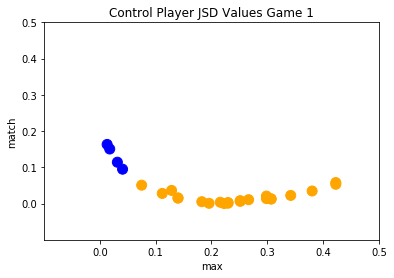

In [1047]:
#under line = matching (closer to 0)
#plots of actual jsd values
control_jsd_g1_plot = control_jsd_g1.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_control_g1,title='Control Player JSD Values Game 1')
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

#plt.xlabel('Match')
#plt.ylabel('Maximize')

plt.ylim(-.1, .5)
plt.xlim(-.1, .5)



#line1 = mlines.Line2D([-1, .5],[-1, .5], color='red')

#control_jsd_g1_plot.add_line(line1)
#s_jsd_g2_plot.add_line(line2)
plt.savefig('control_jsd_1.eps',format='eps',dpi=1000)
plt.show()

# save as jpeg
control_jsd_g1_plot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)






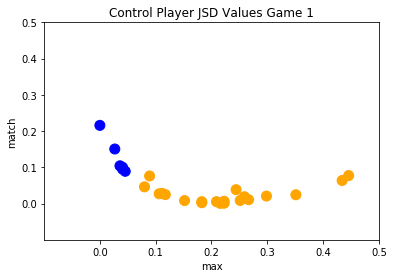

In [1048]:
#under line = matching (closer to 0)
#plots of actual jsd values
control_jsd_g2_plot = control_jsd_g2.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_control_g2,title='Control Player JSD Values Game 1')
plt.xticks(np.arange(0, 1, step=0.1))
plt.yticks(np.arange(0, 1, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

plt.ylim(-.1, .5)
plt.xlim(-.1, .5)

 

#line1 = mlines.Line2D([-1, .5],[-1, .5], color='red')

#control_jsd_g2_plot.add_line(line1)
#s_jsd_g2_plot.add_line(line2)
plt.savefig('control_jsd_1.eps',format='eps',dpi=1000)
plt.show()

# save as jpeg
control_jsd_g2_plot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)


# Joint Analysis

In [238]:
df = organize_trial_by_trial('data/j01_gamedata.csv')
j01 = df
j01_p1_g1_score,j01_p1_g2_score,j01_p2_g1_score,j01_p2_g2_score,j01_p1_diff,j01_p2_diff = call_get_score(j01, 'j')
j01.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,30,8,15
41,1,21,2,3,60,8,15
42,1,22,1,1,90,9,15
43,1,22,2,1,30,9,15
44,1,23,1,2,30,9,15


In [239]:
df = organize_trial_by_trial('data/j02_gamedata.csv')
j02 = df
j02_p1_g1_score,j02_p1_g2_score,j02_p2_g1_score,j02_p2_g2_score,j02_p1_diff,j02_p2_diff = call_get_score(j02, 'j')
j02.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,1,60,8,13
41,1,21,2,3,90,8,14
42,1,22,1,2,90,9,14
43,1,22,2,3,90,9,15
44,1,23,1,3,30,10,15


In [240]:
df = organize_trial_by_trial('data/j03_gamedata.csv')
j03 = df
j03_p1_g1_score,j03_p1_g2_score,j03_p2_g1_score,j03_p2_g2_score,j03_p1_diff,j03_p2_diff = call_get_score(j03, 'j')
j03.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,30,16,14
41,1,21,2,2,30,16,15
42,1,22,1,3,30,17,15
43,1,22,2,1,60,17,15
44,1,23,1,3,30,17,15


In [241]:
df = organize_trial_by_trial('data/j04_gamedata.csv')
j04 = df
j04_p1_g1_score,j04_p1_g2_score,j04_p2_g1_score,j04_p2_g2_score,j04_p1_diff,j04_p2_diff = call_get_score(j04, 'j')
j04.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,30,13,11
41,1,21,2,1,30,13,11
42,1,22,1,2,30,14,11
43,1,22,2,1,30,14,11
44,1,23,1,3,60,15,11


In [242]:
df = organize_trial_by_trial('data/j05_gamedata.csv')
j05 = df
j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,j05_p2_g2_score,j05_p1_diff,j05_p2_diff = call_get_score(j05, 'j')
j05.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,90,15,13
41,1,21,2,1,90,15,14
42,1,22,1,2,90,16,14
43,1,22,2,3,60,16,15
44,1,23,1,2,90,17,15


In [243]:
df = organize_trial_by_trial('data/j06_gamedata.csv')
j06 = df
j06_p1_g1_score,j06_p1_g2_score,j06_p2_g1_score,j06_p2_g2_score,j06_p1_diff,j06_p2_diff = call_get_score(j06, 'j')
j06.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,3,30,11,17
41,1,21,2,1,30,11,17
42,1,22,1,2,60,11,17
43,1,22,2,1,30,11,17
44,1,23,1,3,30,11,17


In [244]:
df = organize_trial_by_trial('data/j07_gamedata.csv')
j07 = df
j07_p1_g1_score,j07_p1_g2_score,j07_p2_g1_score,j07_p2_g2_score,j07_p1_diff,j07_p2_diff = call_get_score(j07, 'j')
j07.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,60,14,15
41,1,21,2,1,90,14,16
42,1,22,1,3,90,15,16
43,1,22,2,1,90,15,16
44,1,23,1,2,60,16,16


In [245]:
df = organize_trial_by_trial('data/j08_gamedata.csv')
j08 = df
j08_p1_g1_score,j08_p1_g2_score,j08_p2_g1_score,j08_p2_g2_score,j08_p1_diff,j08_p2_diff = call_get_score(j08, 'j')
j08.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,90,14,14
41,1,21,2,2,30,14,14
42,1,22,1,3,60,15,14
43,1,22,2,3,60,15,14
44,1,23,1,2,90,16,14


In [246]:
df = organize_trial_by_trial_floatclick('data/j10_gamedata.csv')
j10 = df
j10_p1_g1_score,j10_p1_g2_score,j10_p2_g1_score,j10_p2_g2_score,j10_p1_diff,j10_p2_diff = call_get_score(j10, 'j')
j10.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,21,2,1,60,14,14
42,1,22,1,2,30,14,14
43,1,22,2,3,30,14,14
44,1,22,1,1,60,14,15
45,1,23,2,3,30,15,15


In [247]:
df = organize_trial_by_trial_floatclick('data/j11_gamedata.csv')
j11 = df
j11_p1_g1_score,j11_p1_g2_score,j11_p2_g1_score,j11_p2_g2_score,j11_p1_diff,j11_p2_diff = call_get_score(j11, 'j')
j11.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,21,2,1,90,15,14
42,1,22,1,2,60,15,15
43,1,22,2,2,60,16,15
44,1,23,1,3,90,16,16
45,1,23,2,1,90,17,16


In [248]:
j01_p1_g1, j01_p1_g2, j01_p2_g1, j01_p2_g2 = separate_df(j01, 'j')
j02_p1_g1, j02_p1_g2, j02_p2_g1, j02_p2_g2 = separate_df(j02, 'j')
j03_p1_g1, j03_p1_g2, j03_p2_g1, j03_p2_g2 = separate_df(j03, 'j')
j04_p1_g1, j04_p1_g2, j04_p2_g1, j04_p2_g2 = separate_df(j04, 'j')
j05_p1_g1, j05_p1_g2, j05_p2_g1, j05_p2_g2 = separate_df(j05, 'j')
j06_p1_g1, j06_p1_g2, j06_p2_g1, j06_p2_g2 = separate_df(j06, 'j')
j07_p1_g1, j07_p1_g2, j07_p2_g1, j07_p2_g2 = separate_df(j07, 'j')
j08_p1_g1, j08_p1_g2, j08_p2_g1, j08_p2_g2 = separate_df(j08, 'j')
j10_p1_g1, j10_p1_g2, j10_p2_g1, j10_p2_g2 = separate_df(j10, 'j')
j11_p1_g1, j11_p1_g2, j11_p2_g1, j11_p2_g2 = separate_df(j11, 'j')


/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [249]:
j01_p1_g1_count = j01_p1_g1['probability'].value_counts(sort=False)
j01_p1_g2_count = j01_p1_g2['probability'].value_counts(sort=False)
j01_p2_g1_count = j01_p2_g1['probability'].value_counts(sort=False)
j01_p2_g2_count = j01_p2_g2['probability'].value_counts(sort=False)
j02_p1_g1_count = j02_p1_g1['probability'].value_counts(sort=False)
j02_p1_g2_count = j02_p1_g2['probability'].value_counts(sort=False)
j02_p2_g1_count = j02_p2_g1['probability'].value_counts(sort=False)
j02_p2_g2_count = j02_p2_g2['probability'].value_counts(sort=False)
j03_p1_g1_count = j03_p1_g1['probability'].value_counts(sort=False)
j03_p1_g2_count = j03_p1_g2['probability'].value_counts(sort=False)
j03_p2_g1_count = j03_p2_g1['probability'].value_counts(sort=False)
j03_p2_g2_count = j03_p2_g2['probability'].value_counts(sort=False)
j04_p1_g1_count = j04_p1_g1['probability'].value_counts(sort=False)
j04_p1_g2_count = j04_p1_g2['probability'].value_counts(sort=False)
j04_p2_g1_count = j04_p2_g1['probability'].value_counts(sort=False)
j04_p2_g2_count = j04_p2_g2['probability'].value_counts(sort=False)
j05_p1_g1_count = j05_p1_g1['probability'].value_counts(sort=False)
j05_p1_g2_count = j05_p1_g2['probability'].value_counts(sort=False)
j05_p2_g1_count = j05_p2_g1['probability'].value_counts(sort=False)
j05_p2_g2_count = j05_p2_g2['probability'].value_counts(sort=False)
j06_p1_g1_count = j06_p1_g1['probability'].value_counts(sort=False)
j06_p1_g2_count = j06_p1_g2['probability'].value_counts(sort=False)
j06_p2_g1_count = j06_p2_g1['probability'].value_counts(sort=False)
j06_p2_g2_count = j06_p2_g2['probability'].value_counts(sort=False)
j07_p1_g1_count = j07_p1_g1['probability'].value_counts(sort=False)
j07_p1_g2_count = j07_p1_g2['probability'].value_counts(sort=False)
j07_p2_g1_count = j07_p2_g1['probability'].value_counts(sort=False)
j07_p2_g2_count = j07_p2_g2['probability'].value_counts(sort=False)
j08_p1_g1_count = j08_p1_g1['probability'].value_counts(sort=False)
j08_p1_g2_count = j08_p1_g2['probability'].value_counts(sort=False)
j08_p2_g1_count = j08_p2_g1['probability'].value_counts(sort=False)
j08_p2_g2_count = j08_p2_g2['probability'].value_counts(sort=False)
j10_p1_g1_count = j10_p1_g1['probability'].value_counts(sort=False)
j10_p1_g2_count = j10_p1_g2['probability'].value_counts(sort=False)
j10_p2_g1_count = j10_p2_g1['probability'].value_counts(sort=False)
j10_p2_g2_count = j10_p2_g2['probability'].value_counts(sort=False)
j11_p1_g1_count = j11_p1_g1['probability'].value_counts(sort=False)
j11_p1_g2_count = j11_p1_g2['probability'].value_counts(sort=False)
j11_p2_g1_count = j11_p2_g1['probability'].value_counts(sort=False)
j11_p2_g2_count = j11_p2_g2['probability'].value_counts(sort=False)

# Combined Joint scores G1

In [250]:
j_scores_1 = pd.DataFrame({'participant':['j01_p1', 'j01_p2','j02_p1', 'j02_p2','j03_p1', 'j03_p2','j04_p1', 'j04_p2','j05_p1', 'j05_p2','j06_p1','j06_p2','j07_p1', 'j07_p2','j08_p1', 'j08_p2','j10_p1', 'j10_p2','j11_p1', 'j11_p2'], 'j_score_1':
     [j01_p1_g1_score, j01_p2_g1_score, j02_p1_g1_score, j02_p2_g1_score, j03_p1_g1_score, j03_p2_g1_score,
      j04_p1_g1_score, j04_p2_g1_score, j05_p1_g1_score, j05_p2_g1_score, j06_p1_g1_score, j06_p2_g1_score,
      j07_p1_g1_score, j07_p2_g1_score, j08_p1_g1_score, j08_p2_g1_score, j10_p1_g1_score, j10_p2_g1_score, j11_p1_g1_score, j11_p2_g1_score]})
j_scores_1.set_index('participant', inplace=True, drop=True)
j_scores_1

,j_score_1
participant,
j01_p1,57
j01_p2,61
j02_p1,54
j02_p2,68
j03_p1,69
j03_p2,67
j04_p1,64
j04_p2,56
j05_p1,77


# Combined Joint scores G2

In [251]:
j_scores_2 = pd.DataFrame({'participant':['j01_p1', 'j01_p2','j02_p1', 'j02_p2','j03_p1', 'j03_p2','j04_p1', 'j04_p2','j05_p1', 'j05_p2','j06_p1','j06_p2','j07_p1', 'j07_p2','j08_p1', 'j08_p2','j10_p1', 'j10_p2','j11_p1', 'j11_p2'], 'j_score_2':
     [j01_p1_g2_score, j01_p2_g2_score, j02_p1_g2_score, j02_p2_g2_score, j03_p1_g2_score, j03_p2_g2_score,
      j04_p1_g2_score, j04_p2_g2_score, j05_p1_g2_score, j05_p2_g2_score, j06_p1_g2_score, j06_p2_g2_score,
      j07_p1_g2_score, j07_p2_g2_score, j08_p1_g2_score, j08_p2_g2_score, j10_p1_g2_score, j10_p2_g2_score, j11_p1_g2_score, j11_p2_g2_score]})
j_scores_2.set_index('participant', inplace=True, drop=True)
j_scores_2

,j_score_2
participant,
j01_p1,73
j01_p2,60
j02_p1,72
j02_p2,76
j03_p1,82
j03_p2,75
j04_p1,60
j04_p2,54
j05_p1,70


In [252]:
j_scores = pd.merge(j_scores_1, j_scores_2, on = 'participant')
j_scores.columns=['Game 1','Game 2']
#jp1_scores.set_index('participant', inplace=True, drop=True)
j_scores

,Game 1,Game 2
participant,,
j01_p1,57,73
j01_p2,61,60
j02_p1,54,72
j02_p2,68,76
j03_p1,69,82
j03_p2,67,75
j04_p1,64,60
j04_p2,56,54
j05_p1,77,70


In [253]:
j_scores_1_mean = j_scores_1.mean()

In [254]:
j_scores_1_mean

j_score_1    66.8
dtype: float64

In [255]:
j_scores_1_std = j_scores_1.std()

In [256]:
j_scores_1_std

j_score_1    9.539944
dtype: float64

In [257]:
j_scores_2_mean = j_scores_2.mean()

In [258]:
j_scores_2_mean

j_score_2    74.1
dtype: float64

In [259]:
j_scores_2_std = j_scores_2.std()

In [260]:
j_scores_2_std

j_score_2    8.403633
dtype: float64

In [261]:
j_scores_med = j_scores.median()
j_scores_med

Game 1    66.5
Game 2    75.5
dtype: float64

In [262]:
j_scores_p = sp.stats.ttest_rel(j_scores['Game 1'],j_scores['Game 2'])

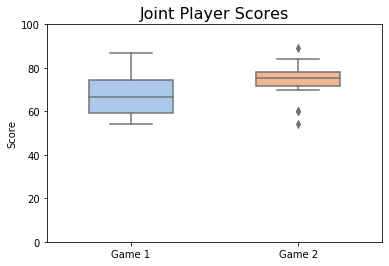

In [263]:
j_scores_box = sns.boxplot( 
                 data=j_scores, 
                 width=0.5,
                 palette="pastel")
j_scores_box.axes.set_title("Joint Player Scores",
                    fontsize=16)

plot_file_name="j_score_box.jpg"
 
plt.ylim(0, 100)
j_scores_box.axes.set(ylabel='Score')

# save as jpeg
j_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [264]:
j_scores_p

Ttest_relResult(statistic=-3.548498529057052, pvalue=0.002145546053304259)

# Joint combined choices in G1

In [265]:
j_g1_counts = pd.DataFrame([j01_p1_g1_count, j01_p2_g1_count, j02_p1_g1_count, j02_p2_g1_count, j03_p1_g1_count, 
              j03_p2_g1_count, j04_p1_g1_count, j04_p2_g1_count, j05_p1_g1_count, j05_p2_g1_count, j06_p1_g1_count, 
              j06_p2_g1_count, j07_p1_g1_count, j07_p2_g1_count, j08_p1_g1_count, j08_p2_g1_count, 
              j10_p1_g1_count, j10_p2_g1_count, j11_p1_g1_count, j11_p2_g1_count],
                index = ['j01_p1_g1_count', 'j01_p2_g1_count', 'j02_p1_g1_count', 'j02_p2_g1_count', 
                 'j03_p1_g1_count', 'j03_p2_g1_count', 'j04_p1_g1_count', 'j04_p2_g1_count', 'j05_p1_g1_count', 
                  'j05_p2_g1_count', 'j06_p1_g1_count', 'j06_p2_g1_count', 'j07_p1_g1_count', 
                    'j07_p2_g1_count', 'j08_p1_g1_count', 'j08_p2_g1_count', 'j10_p1_g1_count', 'j10_p2_g1_count', 
                    'j11_p1_g1_count', 'j11_p2_g1_count'])


In [266]:
j_g1_counts = j_g1_counts.fillna(0)

In [267]:
j_g1_counts 

,30,60,90
j01_p1_g1_count,31.0,30.0,19.0
j01_p2_g1_count,28.0,29.0,23.0
j02_p1_g1_count,27.0,25.0,28.0
j02_p2_g1_count,17.0,32.0,31.0
j03_p1_g1_count,16.0,22.0,42.0
j03_p2_g1_count,23.0,15.0,42.0
j04_p1_g1_count,20.0,31.0,29.0
j04_p2_g1_count,24.0,22.0,34.0
j05_p1_g1_count,3.0,11.0,66.0
j05_p2_g1_count,11.0,20.0,49.0


In [390]:
j_g1_counts.sum(axis=1)

j01_p1_g1_count    80.0
j01_p2_g1_count    80.0
j02_p1_g1_count    80.0
j02_p2_g1_count    80.0
j03_p1_g1_count    80.0
j03_p2_g1_count    80.0
j04_p1_g1_count    80.0
j04_p2_g1_count    80.0
j05_p1_g1_count    80.0
j05_p2_g1_count    80.0
j06_p1_g1_count    80.0
j06_p2_g1_count    80.0
j07_p1_g1_count    80.0
j07_p2_g1_count    80.0
j08_p1_g1_count    80.0
j08_p2_g1_count    80.0
j10_p1_g1_count    80.0
j10_p2_g1_count    80.0
j11_p1_g1_count    80.0
j11_p2_g1_count    80.0
dtype: float64

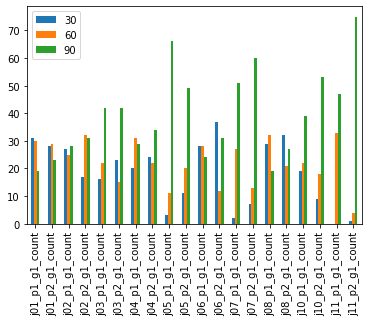

In [268]:
j_g1_counts_bar = j_g1_counts.plot.bar()

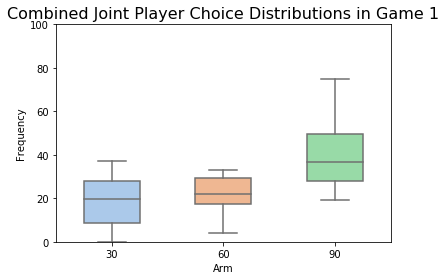

In [269]:
j_g1_counts_box = sns.boxplot( 
                 data=j_g1_counts, 
                 width=0.5,
                 palette="pastel")
j_g1_counts_box.axes.set_title("Combined Joint Player Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="j_g1_counts_box.jpg"
 
plt.ylim(0, 100)
j_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [270]:
j_g1_low = np.mean(j_g1_counts.iloc[:,0])
j_g1_med = np.mean(j_g1_counts.iloc[:,1])
j_g1_high = np.mean(j_g1_counts.iloc[:,2])

In [271]:
j_g1_low

18.2

In [272]:
j_g1_med

22.35

In [273]:
j_g1_high

39.45

In [274]:
j_g1_low_std = np.std(j_g1_counts.iloc[:,0])
j_g1_med_std = np.std(j_g1_counts.iloc[:,1])
j_g1_high_std = np.std(j_g1_counts.iloc[:,2])

In [275]:
j_g1_low_std

11.27652428720836

In [276]:
j_g1_med_std

7.995467466008476

In [277]:
j_g1_high_std

15.464394588861214

# Joint combined choices in G2

In [278]:
j_g2_counts = pd.DataFrame([j01_p1_g2_count, j01_p2_g2_count, j02_p1_g2_count, j02_p2_g2_count, j03_p1_g2_count, 
              j03_p2_g2_count, j04_p1_g2_count, j04_p2_g2_count, j05_p1_g2_count, j05_p2_g2_count, j06_p1_g2_count, 
              j06_p2_g2_count, j07_p1_g2_count, j07_p2_g2_count, j08_p1_g2_count, j08_p2_g2_count, 
              j10_p1_g2_count, j10_p2_g2_count, j11_p1_g2_count, j11_p2_g2_count],
                index = ['j01_p1_g2_count', 'j01_p2_g2_count', 'j02_p1_g2_count', 'j02_p2_g2_count', 
                 'j03_p1_g2_count', 'j03_p2_g2_count', 'j04_p1_g2_count', 'j04_p2_g2_count', 'j05_p1_g2_count', 
                  'j05_p2_g2_count', 'j06_p1_g2_count', 'j06_p2_g2_count', 'j07_p1_g1_count', 'j07_p1_g2_count', 
                 'j08_p1_g2_count', 'j08_p2_g2_count', 'j10_p1_g2_count', 'j10_p2_g2_count', 
                    'j11_p1_g2_count', 'j11_p2_g2_count'])


In [279]:
j_g2_counts = j_g2_counts.fillna(0)
j_g2_counts 

,30,60,90
j01_p1_g2_count,13.0,22.0,45.0
j01_p2_g2_count,21.0,31.0,28.0
j02_p1_g2_count,20.0,25.0,35.0
j02_p2_g2_count,5.0,17.0,58.0
j03_p1_g2_count,3.0,17.0,60.0
j03_p2_g2_count,1.0,1.0,78.0
j04_p1_g2_count,33.0,26.0,21.0
j04_p2_g2_count,31.0,32.0,17.0
j05_p1_g2_count,12.0,9.0,59.0
j05_p2_g2_count,4.0,31.0,45.0


In [391]:
j_g2_counts.sum(axis=1)

j01_p1_g2_count    80.0
j01_p2_g2_count    80.0
j02_p1_g2_count    80.0
j02_p2_g2_count    80.0
j03_p1_g2_count    80.0
j03_p2_g2_count    80.0
j04_p1_g2_count    80.0
j04_p2_g2_count    80.0
j05_p1_g2_count    80.0
j05_p2_g2_count    80.0
j06_p1_g2_count    80.0
j06_p2_g2_count    80.0
j07_p1_g1_count    80.0
j07_p1_g2_count    80.0
j08_p1_g2_count    80.0
j08_p2_g2_count    80.0
j10_p1_g2_count    80.0
j10_p2_g2_count    80.0
j11_p1_g2_count    80.0
j11_p2_g2_count    80.0
dtype: float64

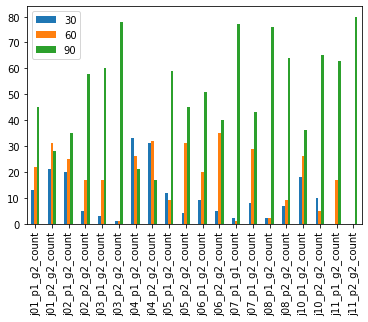

In [280]:
j_g2_counts_bar = j_g2_counts.plot.bar()

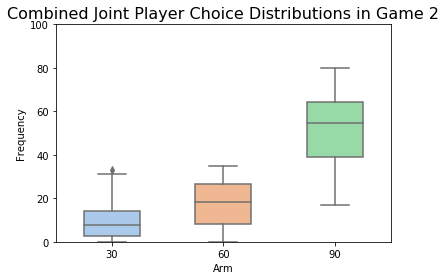

In [281]:
j_g2_counts_box = sns.boxplot( 
                 data=j_g2_counts, 
                 width=0.5,
                 palette="pastel")
j_g2_counts_box.axes.set_title("Combined Joint Player Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="j_g2_counts_box.jpg"
 
plt.ylim(0, 100)
j_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [282]:
j_g2_low = np.mean(j_g2_counts.iloc[:,0])
j_g2_med = np.mean(j_g2_counts.iloc[:,1])
j_g2_high = np.mean(j_g2_counts.iloc[:,2])

In [283]:
j_g2_low

10.2

In [284]:
j_g2_med

17.75

In [285]:
j_g2_high

52.05

In [286]:
j_g2_low_std = np.std(j_g2_counts.iloc[:,0])
j_g2_med_std = np.std(j_g2_counts.iloc[:,1])
j_g2_high_std = np.std(j_g2_counts.iloc[:,2])

In [287]:
j_g2_low_std

9.553009996854394

In [288]:
j_g2_med_std

11.471159488037816

In [289]:
j_g2_high_std

18.54042879763033

# Joint combined arrays

In [290]:
#pip install researchpy

In [291]:
import researchpy as rp

In [292]:
j_90_1 = np.array(j_g1_counts.iloc[:,2])
j_90_2 = np.array(j_g2_counts.iloc[:,2])

In [293]:
j_90_1

array([19., 23., 28., 31., 42., 42., 29., 34., 66., 49., 24., 31., 51.,
       60., 19., 27., 39., 53., 47., 75.])

In [294]:
j_90_2

array([45., 28., 35., 58., 60., 78., 21., 17., 59., 45., 51., 40., 77.,
       43., 76., 64., 36., 65., 63., 80.])

In [295]:
j_60_1 = np.array(j_g1_counts.iloc[:,1])
j_60_2 = np.array(j_g2_counts.iloc[:,1])

In [296]:
j_60_1

array([30., 29., 25., 32., 22., 15., 31., 22., 11., 20., 28., 12., 27.,
       13., 32., 21., 22., 18., 33.,  4.])

In [297]:
j_60_2

array([22., 31., 25., 17., 17.,  1., 26., 32.,  9., 31., 20., 35.,  1.,
       29.,  2.,  9., 26.,  5., 17.,  0.])

In [298]:
j_30_1 = np.array(j_g1_counts.iloc[:,0])
j_30_2 = np.array(j_g2_counts.iloc[:,0])

In [299]:
j_30_1

array([31., 28., 27., 17., 16., 23., 20., 24.,  3., 11., 28., 37.,  2.,
        7., 29., 32., 19.,  9.,  0.,  1.])

In [300]:
j_30_2

array([13., 21., 20.,  5.,  3.,  1., 33., 31., 12.,  4.,  9.,  5.,  2.,
        8.,  2.,  7., 18., 10.,  0.,  0.])

# Joint combined choice statistics

In [301]:
j_90_p = sp.stats.ttest_rel(j_90_1,j_90_2)
j_60_p = sp.stats.ttest_rel(j_60_1,j_60_2)
j_30_p = sp.stats.ttest_rel(j_30_1,j_30_2)

In [302]:
j_90_p

Ttest_relResult(statistic=-2.900942437169285, pvalue=0.009159700182096716)

In [303]:
j_60_p

Ttest_relResult(statistic=1.54540022357181, pvalue=0.1387432585748096)

In [304]:
j_30_p

Ttest_relResult(statistic=2.8330906516142447, pvalue=0.010628032034770642)

In [305]:
#maximizing and matching?

# Multi Analysis

In [306]:
df = organize_trial_by_trial('data/m05_gamedata.csv')
m05 = df
m05_p1_g1_score,m05_p1_g2_score,m05_p2_g1_score,m05_p2_g2_score,m05_p1_score_diff,m05_p2_score_diff = call_get_score(m05, 'm')
m05.head()

,game number,trial,player,arm,probability,P1 score,P2 score
40,1,21,1,2,60,16,14
41,1,21,2,3,90,16,15
42,1,22,1,1,90,17,15
43,1,22,2,2,60,17,16
44,1,23,1,1,90,18,16


In [307]:
df = organize_trial_by_trial_floatclick('data/m06_gamedata.csv')
m06 = df
m06_p1_g1_score,m06_p1_g2_score,m06_p2_g1_score,m06_p2_g2_score,m06_p1_score_diff,m06_p2_score_diff = call_get_score(m06, 'm')
m06.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,1,90,11,13
42,1,42,1,3,30,11,14
43,1,43,2,2,30,11,14
44,1,44,1,1,90,11,14
45,1,45,2,1,90,12,14


In [308]:
df = organize_trial_by_trial_floatclick('data/m08_gamedata.csv')
m08 = df
m08_p1_g1_score,m08_p1_g2_score,m08_p2_g1_score,m08_p2_g2_score,m08_p1_score_diff,m08_p2_score_diff = call_get_score(m08, 'm')
m08.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,3,90,11,13
42,1,42,1,1,90,11,14
43,1,43,2,3,90,12,14
44,1,44,1,1,90,12,15
45,1,45,2,3,90,13,15


In [309]:
#df = organize_trial_by_trial_floatclick('data/m09_gamedata.csv')
#m09 = df
#m09_p1_g1_score,m09_p1_g2_score,m09_p2_g1_score,m09_p2_g2_score,m09_p1_score_diff,m09_p2_score_diff = call_get_score(m09, 'm')
#m09.head()

In [310]:
df = organize_trial_by_trial_floatclick('data/m10_gamedata.csv')
m10 = df
m10_p1_g1_score,m10_p1_g2_score,m10_p2_g1_score,m10_p2_g2_score,m10_p1_score_diff,m10_p2_score_diff = call_get_score(m10, 'm')
m10.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,1,30,16,10
42,1,42,1,1,90,16,10
43,1,43,2,2,60,17,10
44,1,44,1,3,30,17,10
45,1,45,2,2,60,17,10


In [311]:
df = organize_trial_by_trial_floatclick('data/m11_gamedata.csv')
m11 = df
m11_p1_g1_score,m11_p1_g2_score,m11_p2_g1_score,m11_p2_g2_score,m11_p1_score_diff,m11_p2_score_diff = call_get_score(m11, 'm')
m11.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,3,90,9,16
42,1,42,1,3,30,9,17
43,1,43,2,3,90,10,17
44,1,44,1,3,30,10,18
45,1,45,2,3,90,10,18


In [312]:
#df = organize_trial_by_trial_floatclick('data/m12_gamedata.csv')
#m12 = df
#m12_p1_g1_score,m12_p1_g2_score,m12_p2_g1_score,m12_p2_g2_score,m12_p1_score_diff,m12_p2_score_diff = call_get_score(m12, 'm')
#m12.head()

In [313]:
df = organize_trial_by_trial_floatclick('data/m13_gamedata.csv')
m13 = df
m13_p1_g1_score,m13_p1_g2_score,m13_p2_g1_score,m13_p2_g2_score,m13_p1_score_diff,m13_p2_score_diff = call_get_score(m13, 'm')
m13.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,3,90,10,14
42,1,42,1,2,60,10,15
43,1,43,2,2,60,11,15
44,1,44,1,3,30,11,16
45,1,45,2,2,60,11,16


In [314]:
df = organize_trial_by_trial_floatclick('data/m14_gamedata.csv')
m14 = df
m14_p1_g1_score,m14_p1_g2_score,m14_p2_g1_score,m14_p2_g2_score,m14_p1_score_diff,m14_p2_score_diff = call_get_score(m14, 'm')
m14.head()

,game number,trial,player,arm,probability,P1 score,P2 score
41,1,41,2,1,30,17,11
42,1,42,1,1,90,17,11
43,1,43,2,1,30,18,11
44,1,44,1,1,90,18,11
45,1,45,2,2,90,19,11


In [315]:
m05_p1_g1, m05_p1_g2, m05_p2_g1, m05_p2_g2 = separate_df(m05, 'm')
m06_p1_g1, m06_p1_g2, m06_p2_g1, m06_p2_g2 = separate_df(m06, 'm')
m08_p1_g1, m08_p1_g2, m08_p2_g1, m08_p2_g2 = separate_df(m08, 'm')
m10_p1_g1, m10_p1_g2, m10_p2_g1, m10_p2_g2 = separate_df(m10, 'm')
m11_p1_g1, m11_p1_g2, m11_p2_g1, m11_p2_g2 = separate_df(m11, 'm')
m13_p1_g1, m13_p1_g2, m13_p2_g1, m13_p2_g2 = separate_df(m13, 'm')
m14_p1_g1, m14_p1_g2, m14_p2_g1, m14_p2_g2 = separate_df(m14, 'm')

/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/simonefroley/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [316]:
m05_p1_g1_count = m05_p1_g1['probability'].value_counts(sort=False)
m05_p1_g2_count = m05_p1_g2['probability'].value_counts(sort=False)
m05_p2_g1_count = m05_p2_g1['probability'].value_counts(sort=False)
m05_p2_g2_count = m05_p2_g2['probability'].value_counts(sort=False)
m06_p1_g1_count = m06_p1_g1['probability'].value_counts(sort=False)
m06_p1_g2_count = m06_p1_g2['probability'].value_counts(sort=False)
m06_p2_g1_count = m06_p2_g1['probability'].value_counts(sort=False)
m06_p2_g2_count = m06_p2_g2['probability'].value_counts(sort=False)
m08_p1_g1_count = m08_p1_g1['probability'].value_counts(sort=False)
m08_p1_g2_count = m08_p1_g2['probability'].value_counts(sort=False)
m08_p2_g1_count = m08_p2_g1['probability'].value_counts(sort=False)
m08_p2_g2_count = m08_p2_g2['probability'].value_counts(sort=False)
m10_p1_g1_count = m10_p1_g1['probability'].value_counts(sort=False)
m10_p1_g2_count = m10_p1_g2['probability'].value_counts(sort=False)
m10_p2_g1_count = m10_p2_g1['probability'].value_counts(sort=False)
m10_p2_g2_count = m10_p2_g2['probability'].value_counts(sort=False)
m11_p1_g1_count = m11_p1_g1['probability'].value_counts(sort=False)
m11_p1_g2_count = m11_p1_g2['probability'].value_counts(sort=False)
m11_p2_g1_count = m11_p2_g1['probability'].value_counts(sort=False)
m11_p2_g2_count = m11_p2_g2['probability'].value_counts(sort=False)
m13_p1_g1_count = m13_p1_g1['probability'].value_counts(sort=False)
m13_p1_g2_count = m13_p1_g2['probability'].value_counts(sort=False)
m13_p2_g1_count = m13_p2_g1['probability'].value_counts(sort=False)
m13_p2_g2_count = m13_p2_g2['probability'].value_counts(sort=False)
m14_p1_g1_count = m14_p1_g1['probability'].value_counts(sort=False)
m14_p1_g2_count = m14_p1_g2['probability'].value_counts(sort=False)
m14_p2_g1_count = m14_p2_g1['probability'].value_counts(sort=False)
m14_p2_g2_count = m14_p2_g2['probability'].value_counts(sort=False)

# Combined multi scores G1

In [317]:
m_scores_1 = pd.DataFrame({'participant':['m05_p1', 'm05_p2','m06_p1', 'm06_p2', 'm08_p1', 'm08_p2', 'm10_p1', 'm10_p2', 'm11_p1', 'm11_p2', 'm13_p1', 'm13_p2', 'm14_p1', 'm14_p2'], 'm_score_1':
     [m05_p1_g1_score, m05_p2_g1_score, m06_p1_g1_score, m06_p2_g1_score, m08_p1_g1_score, m08_p2_g1_score,
      m10_p1_g1_score, m10_p2_g1_score, m11_p1_g1_score, m11_p2_g1_score, m13_p1_g1_score, m13_p2_g1_score,
      m14_p1_g1_score, m14_p2_g1_score]})
m_scores_1.set_index('participant', inplace=True, drop=True)
m_scores_1

,m_score_1
participant,
m05_p1,86
m05_p2,75
m06_p1,57
m06_p2,71
m08_p1,69
m08_p2,82
m10_p1,69
m10_p2,57
m11_p1,80


# Combined multi scores G2

In [318]:
m_scores_2 = pd.DataFrame({'participant':['m05_p1', 'm05_p2','m06_p1', 'm06_p2', 'm08_p1', 'm08_p2', 'm10_p1', 'm10_p2', 'm11_p1', 'm11_p2', 'm13_p1', 'm13_p2', 'm14_p1', 'm14_p2'], 'm_score_1':
     [m05_p1_g2_score, m05_p2_g2_score, m06_p1_g2_score, m06_p2_g2_score, m08_p1_g2_score, m08_p2_g2_score,
      m10_p1_g2_score, m10_p2_g2_score, m11_p1_g2_score, m11_p2_g2_score, m13_p1_g2_score, m13_p2_g2_score,
      m14_p1_g2_score, m14_p2_g2_score]})
m_scores_2.set_index('participant', inplace=True, drop=True)
m_scores_2

,m_score_1
participant,
m05_p1,68
m05_p2,86
m06_p1,62
m06_p2,68
m08_p1,80
m08_p2,88
m10_p1,66
m10_p2,62
m11_p1,83


In [319]:
m_scores = pd.merge(m_scores_1, m_scores_2, on = 'participant')
m_scores.columns=['Game 1','Game 2']
#jp1_scores.set_index('participant', inplace=True, drop=True)
m_scores

,Game 1,Game 2
participant,,
m05_p1,86,68
m05_p2,75,86
m06_p1,57,62
m06_p2,71,68
m08_p1,69,80
m08_p2,82,88
m10_p1,69,66
m10_p2,57,62
m11_p1,80,83


In [320]:
m_scores_1_mean = m_scores_1.mean()

In [321]:
m_scores_1_mean

m_score_1    70.071429
dtype: float64

In [322]:
m_scores_1_std = m_scores_1.std()

In [323]:
m_scores_1_std

m_score_1    11.166325
dtype: float64

In [324]:
m_scores_2_mean = m_scores_2.mean()

In [325]:
m_scores_2_mean

m_score_1    71.428571
dtype: float64

In [326]:
m_scores_2_std = m_scores_2.std()

In [327]:
m_scores_2_std

m_score_1    11.507284
dtype: float64

In [328]:
m_scores_med = m_scores.median()
m_scores_med

Game 1    70.0
Game 2    68.0
dtype: float64

In [329]:
m_scores_p = sp.stats.ttest_rel(m_scores['Game 1'],m_scores['Game 2'])

In [330]:
m_scores_p

Ttest_relResult(statistic=-0.4688088775680356, pvalue=0.6469706054464561)

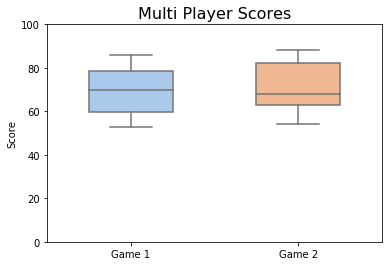

In [331]:
m_scores_box = sns.boxplot( 
                 data=m_scores, 
                 width=0.5,
                 palette="pastel")
m_scores_box.axes.set_title("Multi Player Scores",
                    fontsize=16)

plot_file_name="m_score_box.jpg"
 
plt.ylim(0, 100)
m_scores_box.axes.set(ylabel='Score')

# save as jpeg
m_scores_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [332]:
m_scores_p

Ttest_relResult(statistic=-0.4688088775680356, pvalue=0.6469706054464561)

# Multi combined choices in G1

In [333]:
m_g1_counts = pd.DataFrame([m05_p1_g1_count, m05_p2_g1_count, m06_p1_g1_count, m06_p2_g1_count, m08_p1_g1_count, m08_p2_g1_count, 
              m10_p1_g1_count, m10_p2_g1_count, m11_p1_g1_count, m11_p2_g1_count, m13_p1_g1_count, m13_p2_g1_count, 
              m14_p1_g1_count, m14_p2_g1_count],
                index = ['m05_p1_g1_count', 'm05_p2_g1_count', 'm06_p1_g1_count', 'm06_p2_g1_count',
                 'm08_p1_g1_count', 'm08_p2_g1_count', 'm10_p1_g1_count', 'm10_p2_g1_count', 'm11_p1_g1_count', 
                'm11_p2_g1_count', 'm13_p1_g1_count', 'm13_p2_g1_count', 'm14_p1_g1_count', 'm14_p2_g1_count'])


In [334]:
m_g1_counts = m_g1_counts.fillna(0) 

In [335]:
m_g1_counts

,30,60,90
m05_p1_g1_count,6.0,19.0,55.0
m05_p2_g1_count,9.0,23.0,48.0
m06_p1_g1_count,29.0,26.0,25.0
m06_p2_g1_count,22.0,26.0,32.0
m08_p1_g1_count,7.0,23.0,50.0
m08_p2_g1_count,4.0,20.0,56.0
m10_p1_g1_count,13.0,25.0,42.0
m10_p2_g1_count,24.0,32.0,24.0
m11_p1_g1_count,4.0,0.0,76.0
m11_p2_g1_count,0.0,2.0,78.0


In [392]:
m_g1_counts.sum(axis=1)

m05_p1_g1_count    80.0
m05_p2_g1_count    80.0
m06_p1_g1_count    80.0
m06_p2_g1_count    80.0
m08_p1_g1_count    80.0
m08_p2_g1_count    80.0
m10_p1_g1_count    80.0
m10_p2_g1_count    80.0
m11_p1_g1_count    80.0
m11_p2_g1_count    80.0
m13_p1_g1_count    80.0
m13_p2_g1_count    80.0
m14_p1_g1_count    80.0
m14_p2_g1_count    80.0
dtype: float64

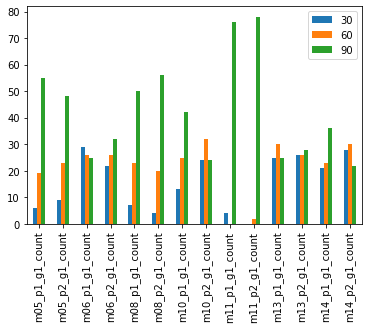

In [336]:
m_g1_counts_bar = m_g1_counts.plot.bar()

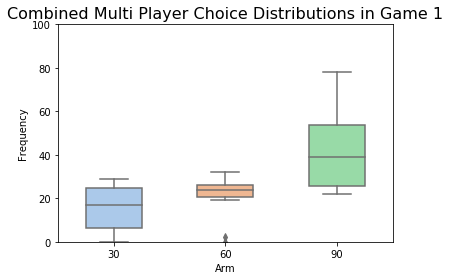

In [337]:
m_g1_counts_box = sns.boxplot( 
                 data = m_g1_counts, 
                 width=0.5,
                 palette="pastel")
m_g1_counts_box.axes.set_title("Combined Multi Player Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="m_g1_counts_box.jpg"
 
plt.ylim(0, 100)
m_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
m_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [338]:
m_g1_low = np.mean(m_g1_counts.iloc[:,0])
m_g1_med = np.mean(m_g1_counts.iloc[:,1])
m_g1_high = np.mean(m_g1_counts.iloc[:,2])

In [339]:
m_g1_low

15.571428571428571

In [340]:
m_g1_med

21.785714285714285

In [341]:
m_g1_high

42.642857142857146

In [342]:
m_g1_low_std = np.std(m_g1_counts.iloc[:,0])
m_g1_med_std = np.std(m_g1_counts.iloc[:,1])
m_g1_high_std = np.std(m_g1_counts.iloc[:,2])

In [343]:
m_g1_low_std

9.997958975384394

In [344]:
m_g1_med_std

9.197659418325415

In [345]:
m_g1_high_std

18.01827303781653

# Multi combined choices in G2

In [346]:
m_g2_counts = pd.DataFrame([m05_p1_g2_count, m05_p2_g2_count, m06_p1_g2_count, m06_p2_g2_count, m08_p1_g2_count, m08_p2_g2_count, 
              m10_p1_g2_count, m10_p2_g2_count, m11_p1_g2_count, m11_p2_g2_count, m13_p1_g2_count, m13_p2_g2_count, 
              m14_p1_g2_count, m14_p2_g2_count],
                index = ['m05_p1_g2_count', 'm05_p2_g2_count', 'm06_p1_g2_count', 'm06_p2_g2_count',
                 'm08_p1_g2_count', 'm08_p2_g2_count', 'm10_p1_g2_count', 'm10_p2_g2_count', 'm11_p1_g2_count', 
                'm11_p2_g2_count', 'm13_p1_g2_count', 'm13_p2_g2_count', 'm14_p1_g2_count', 'm14_p2_g2_count'])


In [347]:
m_g2_counts = m_g2_counts.fillna(0) 

In [393]:
m_g2_counts

,30,60,90
m05_p1_g2_count,2.0,55.0,23.0
m05_p2_g2_count,3.0,4.0,73.0
m06_p1_g2_count,23.0,29.0,28.0
m06_p2_g2_count,22.0,21.0,37.0
m08_p1_g2_count,2.0,5.0,73.0
m08_p2_g2_count,0.0,3.0,77.0
m10_p1_g2_count,21.0,20.0,39.0
m10_p2_g2_count,17.0,23.0,40.0
m11_p1_g2_count,0.0,0.0,80.0
m11_p2_g2_count,0.0,0.0,80.0


In [394]:
m_g2_counts.sum(axis=1)

m05_p1_g2_count    80.0
m05_p2_g2_count    80.0
m06_p1_g2_count    80.0
m06_p2_g2_count    80.0
m08_p1_g2_count    80.0
m08_p2_g2_count    80.0
m10_p1_g2_count    80.0
m10_p2_g2_count    80.0
m11_p1_g2_count    80.0
m11_p2_g2_count    80.0
m13_p1_g2_count    80.0
m13_p2_g2_count    80.0
m14_p1_g2_count    80.0
m14_p2_g2_count    80.0
dtype: float64

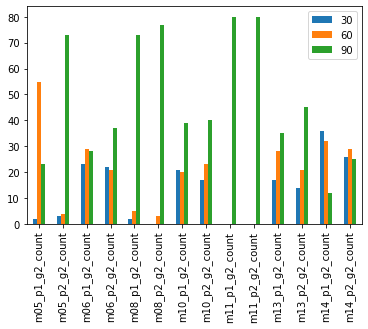

In [349]:
m_g2_counts_bar = m_g2_counts.plot.bar()

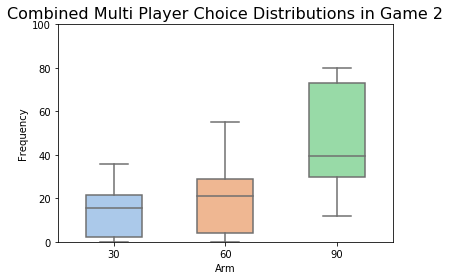

In [350]:
m_g2_counts_box = sns.boxplot( 
                 data = m_g2_counts, 
                 width=0.5,
                 palette="pastel")
m_g2_counts_box.axes.set_title("Combined Multi Player Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="m_g2_counts_box.jpg"
 
plt.ylim(0, 100)
m_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
m_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [351]:
m_g2_low = np.mean(m_g2_counts.iloc[:,0])
m_g2_med = np.mean(m_g2_counts.iloc[:,1])
m_g2_high = np.mean(m_g2_counts.iloc[:,2])

In [352]:
m_g2_low

13.071428571428571

In [353]:
m_g2_med

19.285714285714285

In [354]:
m_g2_high

47.642857142857146

In [355]:
m_g2_low_std = np.std(m_g2_counts.iloc[:,0])
m_g2_med_std = np.std(m_g2_counts.iloc[:,1])
m_g2_high_std = np.std(m_g2_counts.iloc[:,2])

In [356]:
m_g2_low_std

11.417181824615326

In [357]:
m_g2_med_std

15.044830965335242

In [358]:
m_g2_high_std

23.039119349666194

# Multi combined arrays

In [359]:
#pip install researchpy

In [360]:
import researchpy as rp

In [361]:
m_90_1 = np.array(m_g1_counts.iloc[:,2])
m_90_2 = np.array(m_g2_counts.iloc[:,2])

In [362]:
m_90_1

array([55., 48., 25., 32., 50., 56., 42., 24., 76., 78., 25., 28., 36.,
       22.])

In [363]:
m_90_2

array([23., 73., 28., 37., 73., 77., 39., 40., 80., 80., 35., 45., 12.,
       25.])

In [364]:
m_60_1 = np.array(m_g1_counts.iloc[:,1])
m_60_2 = np.array(m_g2_counts.iloc[:,1])

In [365]:
m_60_1

array([19., 23., 26., 26., 23., 20., 25., 32.,  0.,  2., 30., 26., 23.,
       30.])

In [366]:
m_60_2

array([55.,  4., 29., 21.,  5.,  3., 20., 23.,  0.,  0., 28., 21., 32.,
       29.])

In [367]:
m_30_1 = np.array(m_g1_counts.iloc[:,0])
m_30_2 = np.array(m_g2_counts.iloc[:,0])

In [368]:
m_30_1

array([ 6.,  9., 29., 22.,  7.,  4., 13., 24.,  4.,  0., 25., 26., 21.,
       28.])

In [369]:
m_30_2

array([ 2.,  3., 23., 22.,  2.,  0., 21., 17.,  0.,  0., 17., 14., 36.,
       26.])

# Multi combined choice statistics

In [370]:
m_90_p = sp.stats.ttest_rel(m_90_1,m_90_2)
m_60_p = sp.stats.ttest_rel(m_60_1,m_60_2)
m_30_p = sp.stats.ttest_rel(m_30_1,m_30_2)

In [371]:
m_90_p

Ttest_relResult(statistic=-1.1302089465110965, pvalue=0.27881009065695644)

In [372]:
m_60_p

Ttest_relResult(statistic=0.6831300510639732, pvalue=0.5065174191033543)

In [373]:
m_30_p

Ttest_relResult(statistic=1.3683669038452715, pvalue=0.19438207598149615)

In [374]:
#maximizing and matching?

# Total social counts (M & J)

In [860]:
social_counts_g1 = pd.DataFrame([j01_p1_g1_count, j01_p2_g1_count, j02_p1_g1_count, j02_p2_g1_count, j03_p1_g1_count, 
              j03_p2_g1_count, j04_p1_g1_count, j04_p2_g1_count, j05_p1_g1_count, j05_p2_g1_count, j06_p1_g1_count, 
              j06_p2_g1_count, j07_p1_g1_count, j07_p2_g1_count, j08_p1_g1_count, j08_p2_g1_count, 
              j10_p1_g1_count, j10_p2_g1_count, j11_p1_g1_count, j11_p2_g1_count, m05_p1_g1_count, m05_p2_g1_count, m06_p1_g1_count, m06_p2_g1_count, m08_p1_g1_count, m08_p2_g1_count, 
              m10_p1_g1_count, m10_p2_g1_count, m11_p1_g1_count, m11_p2_g1_count, m13_p1_g1_count, m13_p2_g1_count, 
              m14_p1_g1_count, m14_p2_g1_count],
                index = ['j01_p1_g1_count', 'j01_p2_g1_count', 'j02_p1_g1_count', 'j02_p2_g1_count', 
                 'j03_p1_g1_count', 'j03_p2_g1_count', 'j04_p1_g1_count', 'j04_p2_g1_count', 'j05_p1_g1_count', 
                  'j05_p2_g1_count', 'j06_p1_g1_count', 'j06_p2_g1_count', 'j07_p1_g1_count', 
                    'j07_p2_g1_count', 'j08_p1_g1_count', 'j08_p2_g1_count', 'j10_p1_g1_count', 'j10_p2_g1_count', 
                    'j11_p1_g1_count', 'j11_p2_g1_count', 'm05_p1_g1_count', 'm05_p2_g1_count', 'm06_p1_g1_count', 'm06_p2_g1_count',
                 'm08_p1_g1_count', 'm08_p2_g1_count', 'm10_p1_g1_count', 'm10_p2_g1_count', 'm11_p1_g1_count', 
                'm11_p2_g1_count', 'm13_p1_g1_count', 'm13_p2_g1_count', 'm14_p1_g1_count', 'm14_p2_g1_count'])

In [861]:
#How to prevent NaN: df = df.fillna(0)
social_counts_g1=social_counts_g1.fillna(0)

In [862]:
social_counts_g1

,30,60,90
j01_p1_g1_count,31.0,30.0,19.0
j01_p2_g1_count,28.0,29.0,23.0
j02_p1_g1_count,27.0,25.0,28.0
j02_p2_g1_count,17.0,32.0,31.0
j03_p1_g1_count,16.0,22.0,42.0
j03_p2_g1_count,23.0,15.0,42.0
j04_p1_g1_count,20.0,31.0,29.0
j04_p2_g1_count,24.0,22.0,34.0
j05_p1_g1_count,3.0,11.0,66.0
j05_p2_g1_count,11.0,20.0,49.0


In [863]:
social_counts_g1.sum(axis=1)

j01_p1_g1_count    80.0
j01_p2_g1_count    80.0
j02_p1_g1_count    80.0
j02_p2_g1_count    80.0
j03_p1_g1_count    80.0
j03_p2_g1_count    80.0
j04_p1_g1_count    80.0
j04_p2_g1_count    80.0
j05_p1_g1_count    80.0
j05_p2_g1_count    80.0
j06_p1_g1_count    80.0
j06_p2_g1_count    80.0
j07_p1_g1_count    80.0
j07_p2_g1_count    80.0
j08_p1_g1_count    80.0
j08_p2_g1_count    80.0
j10_p1_g1_count    80.0
j10_p2_g1_count    80.0
j11_p1_g1_count    80.0
j11_p2_g1_count    80.0
m05_p1_g1_count    80.0
m05_p2_g1_count    80.0
m06_p1_g1_count    80.0
m06_p2_g1_count    80.0
m08_p1_g1_count    80.0
m08_p2_g1_count    80.0
m10_p1_g1_count    80.0
m10_p2_g1_count    80.0
m11_p1_g1_count    80.0
m11_p2_g1_count    80.0
m13_p1_g1_count    80.0
m13_p2_g1_count    80.0
m14_p1_g1_count    80.0
m14_p2_g1_count    80.0
dtype: float64

In [864]:
social_counts_g2 = pd.DataFrame([j01_p1_g2_count, j01_p2_g2_count, j02_p1_g2_count, j02_p2_g2_count, j03_p1_g2_count, 
              j03_p2_g2_count, j04_p1_g2_count, j04_p2_g2_count, j05_p1_g2_count, j05_p2_g2_count, j06_p1_g2_count, 
              j06_p2_g2_count, j07_p1_g2_count, j07_p2_g2_count, j08_p1_g2_count, j08_p2_g2_count, 
              j10_p1_g2_count, j10_p2_g2_count, j11_p1_g2_count, j11_p2_g2_count, m05_p1_g2_count, m05_p2_g2_count, m06_p1_g2_count, m06_p2_g2_count, m08_p1_g2_count, m08_p2_g2_count, 
              m10_p1_g2_count, m10_p2_g2_count, m11_p1_g2_count, m11_p2_g2_count, m13_p1_g2_count, m13_p2_g2_count, 
              m14_p1_g2_count, m14_p2_g2_count],
                index = ['j01_p1_g2_count', 'j01_p2_g2_count', 'j02_p1_g2_count', 'j02_p2_g2_count', 
                 'j03_p1_g2_count', 'j03_p2_g2_count', 'j04_p1_g2_count', 'j04_p2_g2_count', 'j05_p1_g2_count', 
                  'j05_p2_g2_count', 'j06_p1_g2_count', 'j06_p2_g2_count', 'j07_p1_g2_count', 
                    'j07_p2_g2_count', 'j08_p1_g2_count', 'j08_p2_g2_count', 'j10_p1_g2_count', 'j10_p2_g2_count', 
                    'j11_p1_g2_count', 'j11_p2_g2_count', 'm05_p1_g2_count', 'm05_p2_g2_count', 'm06_p1_g2_count', 'm06_p2_g2_count',
                 'm08_p1_g2_count', 'm08_p2_g2_count', 'm10_p1_g2_count', 'm10_p2_g2_count', 'm11_p1_g2_count', 
                'm11_p2_g2_count', 'm13_p1_g2_count', 'm13_p2_g2_count', 'm14_p1_g2_count', 'm14_p2_g2_count'])

In [865]:
#How to prevent NaN: df = df.fillna(0)
social_counts_g2=social_counts_g2.fillna(0)
social_counts_g2

,30,60,90
j01_p1_g2_count,13.0,22.0,45.0
j01_p2_g2_count,21.0,31.0,28.0
j02_p1_g2_count,20.0,25.0,35.0
j02_p2_g2_count,5.0,17.0,58.0
j03_p1_g2_count,3.0,17.0,60.0
j03_p2_g2_count,1.0,1.0,78.0
j04_p1_g2_count,33.0,26.0,21.0
j04_p2_g2_count,31.0,32.0,17.0
j05_p1_g2_count,12.0,9.0,59.0
j05_p2_g2_count,4.0,31.0,45.0


# Maximizing/Matching SOCIAL

In [884]:
from scipy import stats

In [904]:
#Optional: Idealized probability distributions to use for comparison. These assume a social strategy in which the probability
#distributions of both partners in a joint session are averaged (all holes reward at a 60% rate)

social_max = [0, 0, 100]
social_match = [30/180 * 100,60/180 * 100, 90/180 * 100]

In [905]:
#Calls jsd with the social distributions.
def call_jsd_social(counts):
    maxi = jsd(counts,social_max)
    matchi = jsd(counts,social_match)
    return maxi,matchi

In [922]:
 def check_type(df,*social):
    types = pd.DataFrame(index=['type'])
    for index,row in df.iterrows():
        maxi = row["social_max"]
        matchi = row["social_match"]
        print(index,maxi,matchi)
        if maxi < matchi:
            print('maxi')
            types = types.append({'type' : 'maxi'},ignore_index=True)
            #types[index,'type'] = 'max'
            num = maxi
        elif matchi < maxi:
            print('matchi')
            types = types.append({'type' : 'matchi'},ignore_index=True)
            num = matchi
        else:
            types = types.append({'type' : 'neither'},ignore_index=True)
            num = 1
        #if social == True:
          #  if num >= jsd(social_max,social_match):
          #      types = types.append({'type' : 'neither'},ignore_index=True)
       # else:
       #     if num >= jsd(maximize,match):
          #      types = types.append({'type' : 'neither'},ignore_index=True)
    return types

In [916]:
j01_p1_g1_social_max,j01_p1_g1_social_match = call_jsd_social(j01_p1_g1_count)
j01_p1_g2_social_max,j01_p1_g2_social_match = call_jsd_social(j01_p1_g2_count)
j01_p2_g1_social_max,j01_p2_g1_social_match = call_jsd_social(j01_p2_g1_count)
j01_p2_g2_social_max,j01_p2_g2_social_match = call_jsd_social(j01_p2_g2_count)
j02_p1_g1_social_max,j02_p1_g1_social_match = call_jsd_social(j02_p1_g1_count)
j02_p1_g2_social_max,j02_p1_g2_social_match = call_jsd_social(j02_p1_g2_count)
j02_p2_g1_social_max,j02_p2_g1_social_match = call_jsd_social(j02_p2_g1_count)
j02_p2_g2_social_max,j02_p2_g2_social_match = call_jsd_social(j02_p2_g2_count)
j03_p1_g1_social_max,j03_p1_g1_social_match = call_jsd_social(j03_p1_g1_count)
j03_p1_g2_social_max,j03_p1_g2_social_match = call_jsd_social(j03_p1_g2_count)
j03_p2_g1_social_max,j03_p2_g1_social_match = call_jsd_social(j03_p2_g1_count)
j03_p2_g2_social_max,j03_p2_g2_social_match = call_jsd_social(j03_p2_g2_count)
j04_p1_g1_social_max,j04_p1_g1_social_match = call_jsd_social(j04_p1_g1_count)
j04_p1_g2_social_max,j04_p1_g2_social_match = call_jsd_social(j04_p1_g2_count)
j04_p2_g1_social_max,j04_p2_g1_social_match = call_jsd_social(j04_p2_g1_count)
j04_p2_g2_social_max,j04_p2_g2_social_match = call_jsd_social(j04_p2_g2_count)
j05_p1_g1_social_max,j05_p1_g1_social_match = call_jsd_social(j05_p1_g1_count)
j05_p1_g2_social_max,j05_p1_g2_social_match = call_jsd_social(j05_p1_g2_count)
j05_p2_g1_social_max,j05_p2_g1_social_match = call_jsd_social(j05_p2_g1_count)
j05_p2_g2_social_max,j05_p2_g2_social_match = call_jsd_social(j05_p2_g2_count)
j06_p1_g1_social_max,j06_p1_g1_social_match = call_jsd_social(j06_p1_g1_count)
j06_p1_g2_social_max,j06_p1_g2_social_match = call_jsd_social(j06_p1_g2_count)
j06_p2_g1_social_max,j06_p2_g1_social_match = call_jsd_social(j06_p2_g1_count)
j06_p2_g2_social_max,j06_p2_g2_social_match = call_jsd_social(j06_p2_g2_count)
j07_p1_g1_social_max,j07_p1_g1_social_match = call_jsd_social(j07_p1_g1_count)
j07_p1_g2_social_max,j07_p1_g2_social_match = call_jsd_social(j07_p1_g2_count)
j07_p2_g1_social_max,j07_p2_g1_social_match = call_jsd_social(j07_p2_g1_count)
j07_p2_g2_social_max,j07_p2_g2_social_match = call_jsd_social(j07_p2_g2_count)
j08_p1_g1_social_max,j08_p1_g1_social_match = call_jsd_social(j08_p1_g1_count)
j08_p1_g2_social_max,j08_p1_g2_social_match = call_jsd_social(j08_p1_g2_count)
j08_p2_g1_social_max,j08_p2_g1_social_match = call_jsd_social(j08_p2_g1_count)
j08_p2_g2_social_max,j08_p2_g2_social_match = call_jsd_social(j08_p2_g2_count)
j10_p1_g1_social_max,j10_p1_g1_social_match = call_jsd_social(j10_p1_g1_count)
j10_p1_g2_social_max,j10_p1_g2_social_match = call_jsd_social(j10_p1_g2_count)
j10_p2_g1_social_max,j10_p2_g1_social_match = call_jsd_social(j10_p2_g1_count)
j10_p2_g2_social_max,j10_p2_g2_social_match = call_jsd_social(j10_p2_g2_count)
j11_p1_g1_social_max,j11_p1_g1_social_match = call_jsd_social([0,33,48])
j11_p1_g2_social_max,j11_p1_g2_social_match = call_jsd_social([0,17,64])
j11_p2_g1_social_max,j11_p2_g1_social_match = call_jsd_social(j11_p2_g1_count)
j11_p2_g2_social_max,j11_p2_g2_social_match = call_jsd_social([0,1,99])
m05_p1_g1_social_max,m05_p1_g1_social_match = call_jsd_social(m05_p1_g1_count)
m05_p1_g2_social_max,m05_p1_g2_social_match = call_jsd_social(m05_p1_g2_count)
m05_p2_g1_social_max,m05_p2_g1_social_match = call_jsd_social(m05_p2_g1_count)
m05_p2_g2_social_max,m05_p2_g2_social_match = call_jsd_social(m05_p2_g2_count)
m06_p1_g1_social_max,m06_p1_g1_social_match = call_jsd_social(m06_p1_g1_count)
m06_p1_g2_social_max,m06_p1_g2_social_match = call_jsd_social(m06_p1_g2_count)
m06_p2_g1_social_max,m06_p2_g1_social_match = call_jsd_social(m06_p2_g1_count)
m06_p2_g2_social_max,m06_p2_g2_social_match = call_jsd_social(m06_p2_g2_count)
m08_p1_g1_social_max,m08_p1_g1_social_match = call_jsd_social(m08_p1_g1_count)
m08_p1_g2_social_max,m08_p1_g2_social_match = call_jsd_social(m08_p1_g2_count)
m08_p2_g1_social_max,m08_p2_g1_social_match = call_jsd_social(m08_p2_g1_count)
m08_p2_g2_social_max,m08_p2_g2_social_match = call_jsd_social([0,3,77])
m10_p1_g1_social_max,m10_p1_g1_social_match = call_jsd_social(m10_p1_g1_count)
m10_p1_g2_social_max,m10_p1_g2_social_match = call_jsd_social(m10_p1_g2_count)
m10_p2_g1_social_max,m10_p2_g1_social_match = call_jsd_social(m10_p2_g1_count)
m10_p2_g2_social_max,m10_p2_g2_social_match = call_jsd_social(m10_p2_g2_count)
m11_p1_g1_social_max,m11_p1_g1_social_match = call_jsd_social([5,0,76])
m11_p1_g2_social_max,m11_p1_g2_social_match = call_jsd_social([0,2,78])
m11_p2_g1_social_max,m11_p2_g1_social_match = call_jsd_social([0,0,81])
m11_p2_g2_social_max,m11_p2_g2_social_match = call_jsd_social([0,0,100])
m13_p1_g1_social_max,m13_p1_g1_social_match = call_jsd_social(m13_p1_g1_count)
m13_p1_g2_social_max,m13_p1_g2_social_match = call_jsd_social(m13_p1_g2_count)
m13_p2_g1_social_max,m13_p2_g1_social_match = call_jsd_social(m13_p2_g1_count)
m13_p2_g2_social_max,m13_p2_g2_social_match = call_jsd_social(m13_p2_g2_count)
m14_p1_g1_social_max,m14_p1_g1_social_match = call_jsd_social(m14_p1_g1_count)
m14_p1_g2_social_max,m14_p1_g2_social_match = call_jsd_social(m14_p1_g2_count)
m14_p2_g1_social_max,m14_p2_g1_social_match = call_jsd_social(m14_p2_g1_count)
m14_p2_g2_social_max,m14_p2_g2_social_match = call_jsd_social(m14_p2_g2_count)

In [959]:
#Create a dataframe for single player game 1 jsd scores, with a column for each strategy.'''
social_jsd_g1 = pd.DataFrame({'social_max':[j01_p1_g1_social_max,j01_p2_g1_social_max,j02_p1_g1_social_max,j02_p2_g1_social_max,j03_p1_g1_social_max,j03_p2_g1_social_max,
                             j04_p1_g1_social_max,j04_p2_g1_social_max,j05_p1_g1_social_max,j05_p2_g1_social_max,j06_p1_g1_social_max,j06_p2_g1_social_max,
                             j07_p1_g1_social_max,j07_p2_g1_social_max,j08_p1_g1_social_max,j08_p2_g1_social_max, j10_p1_g1_social_max, j10_p2_g1_social_max,
                               j11_p1_g1_social_max, j11_p2_g1_social_max, m05_p1_g1_social_max, m05_p2_g1_social_max, m06_p1_g1_social_max, m06_p2_g1_social_max,
                                   m08_p1_g1_social_max, m08_p2_g1_social_max, m10_p1_g1_social_max, m10_p2_g1_social_max, m11_p1_g1_social_max, m11_p2_g1_social_max,
                                    m13_p1_g1_social_max, m13_p2_g1_social_max, m14_p1_g1_social_max, m14_p2_g1_social_max],
                    'social_match':[j01_p1_g1_social_match,j01_p2_g1_social_match,j02_p1_g1_social_match, j02_p2_g1_social_match,j03_p1_g1_social_match,j03_p2_g1_social_match,
                               j04_p1_g1_social_match,j04_p2_g1_social_match,j05_p1_g1_social_match,
                               j05_p2_g1_social_match,j06_p1_g1_social_match,j06_p2_g1_social_match,
                               j07_p1_g1_social_match,j07_p2_g1_social_match,j08_p1_g1_social_match,j08_p2_g1_social_match, j10_p1_g1_social_match,
                               j10_p2_g1_social_match, j11_p1_g1_social_match, j11_p2_g1_social_match, m05_p1_g1_social_match, m05_p2_g1_social_match,
                               m06_p1_g1_social_match, m06_p2_g1_social_match, m08_p1_g1_social_match, m08_p2_g1_social_match, m10_p1_g1_social_match,
                               m10_p2_g1_social_match, m11_p1_g1_social_match, m11_p2_g1_social_match, m13_p1_g1_social_match, m13_p2_g1_social_match,
                               m14_p1_g1_social_match, m14_p2_g1_social_match]}, 
                         index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04',
                                'j04','j05', 'j05', 'j06', 'j06','j07','j07','j08','j08', 'j10', 'j10', 'j11', 'j11','m05','m05','m06', 'm06', 'm08', 'm08', 'm10', 'm10', 'm11', 'm11', 'm13','m13', 'm14', 'm14'])

In [960]:
#to print wothout truncation
pd.set_option('display.max_rows', None)

In [961]:
social_jsd_g1

,social_max,social_match
j01,0.390582,0.047114
j01,0.351281,0.031443
j02,0.306858,0.021582
j02,0.282259,0.006480
j03,0.202233,0.002312
j03,0.202233,0.018633
j04,0.298502,0.010717
j04,0.258971,0.012580
j05,0.064852,0.063203
j05,0.157807,0.006536


In [962]:
social_types_g1 = check_type(social_jsd_g1)

j01 0.39058221940212334 0.04711424829797456
matchi
j01 0.3512810052638734 0.03144346735247976
matchi
j02 0.3068577088686985 0.021582370841057137
matchi
j02 0.28225894160545145 0.0064804619548694195
matchi
j03 0.20223272608716225 0.0023116296488244897
matchi
j03 0.20223272608716222 0.018633232726506604
matchi
j04 0.2985021223133303 0.010716964599497024
matchi
j04 0.25897071489674234 0.012580304393477631
matchi
j05 0.06485203667392961 0.06320260353544513
matchi
j05 0.15780671317666733 0.00653564186933259
matchi
j06 0.3420144880071857 0.02935839122581814
matchi
j06 0.2822589416054515 0.05758813106443683
matchi
j07 0.14586210995682214 0.03349062077390598
matchi
j07 0.09560258894703257 0.033873603126810266
matchi
j08 0.39058221940212334 0.043951820706237654
matchi
j08 0.31537868598871693 0.03479193188747845
matchi
j10 0.2226805511392874 0.004559719207222615
matchi
j10 0.13421698142669358 0.013630085353987326
matchi
j11 0.16754366135865273 0.06158127808519677
matchi
j11 0.02216496910151147 0

In [963]:
social_types_g1.drop([0])

,type
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,matchi
7,matchi
8,matchi
9,matchi
10,matchi


In [964]:
#Create a dataframe for single player game 1 jsd scores, with a column for each strategy.'''
social_jsd_g2 = pd.DataFrame({'social_max':[j01_p1_g2_social_max,j01_p2_g2_social_max,j02_p1_g2_social_max,j02_p2_g2_social_max,j03_p1_g2_social_max,j03_p2_g2_social_max,
                             j04_p1_g2_social_max,j04_p2_g2_social_max,j05_p1_g2_social_max,j05_p2_g2_social_max,j06_p1_g2_social_max,j06_p2_g2_social_max,
                             j07_p1_g2_social_max,j07_p2_g2_social_max,j08_p1_g2_social_max,j08_p2_g2_social_max, j10_p1_g2_social_max, j10_p2_g2_social_max,
                               j11_p1_g2_social_max, j11_p2_g2_social_max, m05_p1_g2_social_max, m05_p2_g2_social_max, m06_p1_g2_social_max, m06_p2_g2_social_max,
                                   m08_p1_g2_social_max, m08_p2_g2_social_max, m10_p1_g2_social_max, m10_p2_g2_social_max, m11_p1_g2_social_max, m11_p2_g2_social_max,
                                    m13_p1_g2_social_max, m13_p2_g2_social_max, m14_p1_g2_social_max, m14_p2_g2_social_max],
                    'social_match':[j01_p1_g2_social_match,j01_p2_g2_social_match,j02_p1_g2_social_match, j02_p2_g2_social_match,j03_p1_g2_social_match,j03_p2_g2_social_match,
                               j04_p1_g2_social_match,j04_p2_g2_social_match,j05_p1_g2_social_match,
                               j05_p2_g2_social_match,j06_p1_g2_social_match,j06_p2_g2_social_match,
                               j07_p1_g2_social_match,j07_p2_g2_social_match,j08_p1_g2_social_match,j08_p2_g2_social_match, j10_p1_g2_social_match,
                               j10_p2_g2_social_match, j11_p1_g2_social_match, j11_p2_g2_social_match, m05_p1_g2_social_match, m05_p2_g2_social_match,
                               m06_p1_g2_social_match, m06_p2_g2_social_match, m08_p1_g2_social_match, m08_p2_g2_social_match, m10_p1_g2_social_match,
                               m10_p2_g2_social_match, m11_p1_g2_social_match, m11_p2_g2_social_match, m13_p1_g2_social_match, m13_p2_g2_social_match,
                               m14_p1_g2_social_match, m14_p2_g2_social_match]}, 
                         index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04',
                                'j04','j05', 'j05', 'j06', 'j06','j07','j07','j08','j08', 'j10', 'j10', 'j11', 'j11','m05','m05','m06', 'm06', 'm08', 'm08', 'm10', 'm10', 'm11', 'm11', 'm13','m13', 'm14', 'm14'])

In [926]:
social_jsd_g2

,social_max,social_match
j01,0.182664,0.002333
j01,0.306858,0.013066
j02,0.251473,0.005405
j02,0.106315,0.029416
j03,0.095603,0.041401
j03,0.008743,0.171328
j04,0.370459,0.045764
j04,0.411771,0.053986
j05,0.100928,0.040277
j05,0.182664,0.018507


In [927]:
social_types_g2 = check_type(social_jsd_g2)

j01 0.18266421587736578 0.002333387236177256
matchi
j01 0.30685770886869845 0.013066262687201312
matchi
j02 0.25147291908660935 0.00540537820602017
matchi
j02 0.10631478577187409 0.029416293677458204
matchi
j03 0.09560258894703257 0.04140112504720802
matchi
j03 0.008743455793932257 0.17132770165729386
maxi
j04 0.37045924159204036 0.045764058865540434
matchi
j04 0.4117708849851833 0.05398576231672957
matchi
j05 0.10092820092983168 0.04027683374917705
matchi
j05 0.18266421587736578 0.018507019294240326
matchi
j06 0.14586210995682214 0.009796023082461316
matchi
j06 0.21576155433883565 0.015812644226358384
matchi
j07 0.013175660665944238 0.15948877173095694
maxi
j07 0.19561630579698502 0.004855849847319025
matchi
j08 0.01764922746459481 0.1436688481158736
maxi
j08 0.07488176162235435 0.05232428572119931
matchi
j10 0.24409937049739652 0.002864658569809048
matchi
j10 0.06984037222334313 0.07113583385798919
maxi
j11 0.07890339174823698 0.08128962909967118
maxi
j11 0.003478298769743019 0.19519

In [928]:
social_types_g2.drop([0])

,type
1,matchi
2,matchi
3,matchi
4,matchi
5,matchi
6,maxi
7,matchi
8,matchi
9,matchi
10,matchi


In [952]:
import matplotlib.lines as mlines

In [930]:
#colors_jsd = [['lightcoral','red','lightcoral','red','bisque','orange','bisque','orange','palegreen','green','palegreen','green',
              #'lightblue','blue','lightblue','blue','mediumslateblue','indigo','mediumslateblue','indigo','lightpink','deeppink',
              #'lightpink','deeppink','yellow','gold','yellow','gold','lightgray','gray','lightgray','gray']              

In [953]:
import itertools

In [973]:
#Here I think I tried to create colors for each subject in each condition for use in graphs. I DON'T think this is 
#a good way to do this.'''
#colors_jsd_j = ['red','lightcoral','orange','darkorange','green','orange',
             # 'blue','darkblue','hotblue','blue','purple','plum','peru','saddlebrown','gray','lightgray']
colors_jsd_social_g1 = ['orange','orange','orange','orange','orange','orange','orange',
                        'orange','orange','orange', 'orange','orange','orange','orange',
              'orange', 'orange','orange', 'orange','orange', 'blue','orange','orange',
                        'orange','orange','orange','orange', 'orange', 'orange','blue', 
                        'blue','orange','orange','orange','orange']


colors_jsd_social_g2 = ['orange','orange','orange','orange','orange','blue','orange',
                        'orange','orange','orange', 'orange','orange','blue','orange',
              'blue', 'orange','orange', 'orange','blue', 'blue','orange','blue',
                        'orange','orange','blue','blue', 'orange', 'orange','blue', 
                        'blue','orange','orange','orange','orange']
#markers_jsd = ['o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v'
         # 'o','v','o','v','o','v','o','v']
colors

['red',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'blue']

In [568]:
#Here I print the means of the JSD values in each condition, just to see what they are.'''

In [933]:
#run t test to see sig between max and match per game
#put in box plot
social_jsd_g1.mean()

social_max      0.223759
social_match    0.036884
dtype: float64

In [934]:
social_jsd_g2.mean()

social_max      0.168598
social_match    0.063499
dtype: float64

In [935]:
import matplotlib.patches as mpatches

# Graphs

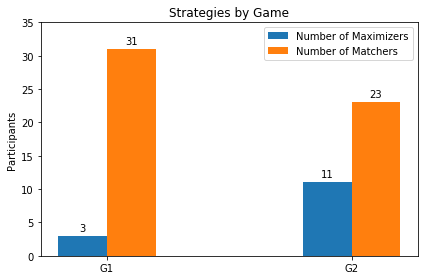

In [972]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['G1', 'G2']
max_counts = [3, 11]
match_counts = [31, 23]

x = np.arange(len(labels))  # the label locations
width = 0.20  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, max_counts, width, label='Number of Maximizers')
rects2 = ax.bar(x + width/2, match_counts, width, label='Number of Matchers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Participants')
ax.set_title('Strategies by Game')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


plt.ylim(0, 35)



def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [936]:
#Here I try to plot the JSD Values. Continued below under 'JSD with gender.

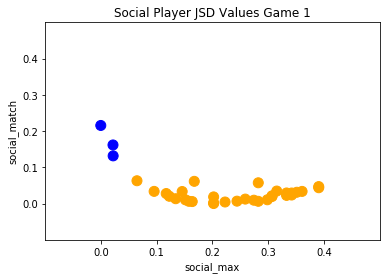

In [974]:
#under line = matching (closer to 0)
#plots of atual jsd values
social_jsd_g1_plot = social_jsd_g1.plot.scatter(x='social_max',y='social_match',s=100,colors=colors_jsd_social_g1,title='Social Player JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

plt.ylim(-.1, .5)
plt.xlim(-.1, .5)

#line1 = mlines.Line2D([-1, .5],[-1, .5], color='red')

#social_jsd_g1_plot.add_line(line1)
#s_jsd_g2_plot.add_line(line2)
plt.savefig('social_jsd_1.eps',format='eps',dpi=1000)
plt.show()

# save as jpeg
social_jsd_g1_plot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

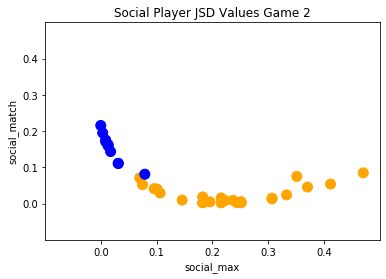

In [975]:
#under line = matching (closer to 0)
#plots of atual jsd values
social_jsd_g2_plot = social_jsd_g2.plot.scatter(x='social_max',y='social_match',s=100,colors=colors_jsd_social_g2,title='Social Player JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

plt.ylim(-.1, .5)
plt.xlim(-.1, .5)

#line1 = mlines.Line2D([-1, .5],[-1, .5], color='red')

#social_jsd_g2_plot.add_line(line1)
#s_jsd_g2_plot.add_line(line2)
plt.savefig('social_jsd_2.eps',format='eps',dpi=1000)
plt.show()

# save as jpeg
social_jsd_g2_plot.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [558]:
threshold_social = jsd(social_max,social_match)

In [559]:
threshold_social

0.3182570841474064

# End of SMAB3 analysis

In [ ]:
#hypothesis: scores lower for same gender pairs: male-male
'''here i compared scores of pairs of mixed gender and same gender pairs. there are a lot of different types of analyses you can
do on the choice data, and you can group the data by demographics, questionnaire responses, etc.'''

In [ ]:
scores_f = pd.DataFrame([j03_p1_g1_score,j03_p1_g2_score,j03_p2_g1_score,j03_p2_g2_score,j04_p1_g1_score,
            j04_p1_g2_score,j04_p2_g1_score,j04_p2_g2_score,j07_p1_g1_score,j07_p1_g2_score,j07_p2_g1_score,
            j07_p2_g2_score,j08_p1_g1_score,j08_p1_g2_score,j08_p2_g1_score,j08_p2_g2_score])

In [ ]:
scores_mix = pd.DataFrame([j01_p1_g1_score,j01_p1_g2_score,j01_p2_g1_score,j01_p2_g2_score,j02_p1_g1_score,
            j02_p1_g2_score,j02_p2_g1_score,j02_p2_g2_score,j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,
            j05_p2_g2_score,j05_p1_g1_score,j05_p1_g2_score,j05_p2_g1_score,j05_p2_g2_score,j06_p1_g1_score,
            j06_p1_g2_score,j06_p2_g1_score,j06_p2_g2_score])

In [ ]:
#m_mean=scores_m.mean()
f_mean=scores_f.mean()
mix_mean=scores_mix.mean()

In [ ]:
#m_mean

In [ ]:
f_mean

In [ ]:
mix_mean

In [ ]:
j_combo = j_combo.sort_values(by=['participant'])

In [ ]:
#j_combo_bar = j_combo.plot(kind='bar',color=colors)

In [ ]:
j_score_diff = pd.DataFrame({'participant':['j01_p1','j01_p2','j02_p1','j02_p2','j03_p1','j03_p2','j04_p1','j04_p2',
                                          'j05_p1','j05_p2','j06_p1','j06_p2','j07_p1','j07_p2','j06_p1','j06_p2'], 'score_diff':
     [j01_p1_diff,j01_p2_diff,j02_p1_diff,j02_p2_diff,j03_p1_diff,j03_p2_diff,j04_p1_diff,j04_p2_diff,
     j05_p1_diff,j05_p2_diff,j06_p1_diff,j06_p2_diff,j07_p1_diff,j07_p2_diff,j08_p1_diff,j08_p2_diff]})

In [ ]:
j_score_diff

In [ ]:
#impairs learning?

In [ ]:
#pattern within sessions for score_diff?
#5 ppl did worse second time; joint interfered with learning

In [ ]:
j_score_diff_mean = j_score_diff['score_diff'].mean()

In [ ]:
j_score_diff_mean

In [ ]:
j01_p1_g1, j01_p1_g2, j01_p2_g1, j01_p2_g2 = separate_df(j01, 'j')
j02_p1_g1, j02_p1_g2, j02_p2_g1, j02_p2_g2 = separate_df(j02, 'j')
j03_p1_g1, j03_p1_g2, j03_p2_g1, j03_p2_g2 = separate_df(j03, 'j')
j04_p1_g1, j04_p1_g2, j04_p2_g1, j04_p2_g2 = separate_df(j04, 'j')
j05_p1_g1, j05_p1_g2, j05_p2_g1, j05_p2_g2 = separate_df(j05, 'j')
j06_p1_g1, j06_p1_g2, j06_p2_g1, j06_p2_g2 = separate_df(j06, 'j')
j07_p1_g1, j07_p1_g2, j07_p2_g1, j07_p2_g2 = separate_df(j07, 'j')
j08_p1_g1, j08_p1_g2, j08_p2_g1, j08_p2_g2 = separate_df(j08, 'j')

In [ ]:
#social matching

In [ ]:
j_g2_counts = pd.DataFrame([j01_p1_g2_count, j01_p2_g2_count, j02_p1_g2_count, j02_p2_g2_count, 
                            j03_p1_g2_count, j03_p2_g2_count, j04_p1_g2_count, j04_p2_g2_count,
                           j05_p1_g2_count,j05_p2_g2_count, j06_p1_g2_count, j06_p2_g2_count, j07_p1_g2_count, 
                            j07_p2_g2_count, j08_p1_g2_count, j08_p2_g2_count],
                          index=['j01_p1_g2_count', 'j01_p2_g2_count', 'j02_p1_g2_count', 'j02_p2_g2_count', 
                            'j03_p1_g2_count', 'j03_p2_g2_count', 'j04_p1_g2_count', 'j04_p2_g2_count',
                           'j05_p1_g2_count','j05_p2_g2_count', 'j06_p1_g2_count', 'j06_p2_g2_count', 'j07_p1_g2_count', 
                            'j07_p2_g2_count', 'j08_p1_g2_count', 'j08_p2_g2_count'])

In [ ]:
j_g2_counts

In [ ]:
j_60_p = sp.stats.ttest_rel(j_g1_counts.iloc[:,1],j_g2_counts.iloc[:,1])

In [ ]:
j_60_p

In [ ]:
j_30_p = sp.stats.ttest_rel(j_g1_counts.iloc[:,0],j_g2_counts.iloc[:,0])

In [ ]:
j_30_p

In [ ]:
j_g2_low = np.mean(j_g2_counts.iloc[:,0])
j_g2_med = np.mean(j_g2_counts.iloc[:,1])
j_g2_high = np.mean(j_g2_counts.iloc[:,2])

j_g2_low_std = np.std(j_g2_counts.iloc[:,0])
j_g2_med_std = np.std(j_g2_counts.iloc[:,1])
j_g2_high_std = np.std(j_g2_counts.iloc[:,2])

In [ ]:
j_g2_low

In [ ]:
j_g2_med

In [ ]:
j_g2_high

In [ ]:
j_g1_counts_bar = j_g1_counts.plot.bar()

In [ ]:
j_g2_counts_bar = j_g2_counts.plot.bar()

In [ ]:
j_g1_counts_box = sns.boxplot( 
                 data=j_g1_counts, 
                 width=0.5,
                 palette="pastel")
j_g1_counts_box.axes.set_title("Multiplayer Choice Distributions in Game 1",
                    fontsize=16)

plot_file_name="j_g1_counts_box.jpg"

plt.ylim(0, 100)
j_g1_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g1_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [ ]:
j_g2_counts_box = sns.boxplot( 
                 data=j_g2_counts, 
                 width=0.5,
                 palette="pastel")
j_g2_counts_box.axes.set_title("Multiplayer Choice Distributions in Game 2",
                    fontsize=16)

plot_file_name="j_g2_counts_box.jpg"

plt.ylim(0, 100)
j_g2_counts_box.axes.set(xlabel='Arm',ylabel='Frequency')

# save as jpeg
j_g2_counts_box.figure.savefig(plot_file_name,
                    format='jpeg',
                    dpi=100)

In [ ]:
hannah_counts = pd.DataFrame([s08_p1_g1_count,s08_p1_g2_count,s09_p1_g1_count,s09_p1_g2_count,j01_p1_g1_count,
                              j01_p1_g2_count,j01_p2_g1_count,j01_p2_g2_count,j05_p1_g1_count,j05_p1_g2_count,j05_p1_g1_count,
                              j05_p2_g2_count],
                          index=['s08 Game 1','s08 Game 2','s09 Game 1','s09 Game 2','j01_1 Game 1','j01_1 Game 2',
                                'j01_2 Game 1','j01_2 Game 2','j05_1 Game 1','j05_1 Game 2','j05_2 Game 1','j05_2 Game 2'])

In [ ]:
hannah_counts

In [ ]:
hannah_counts.to_pickle('hannah_counts_table.pkl')

In [ ]:
hannah_counts_bar = hannah_counts.plot.bar(title='Choice Distributions')
plt.tight_layout()
plt.savefig('hannah_counts.eps',format='eps',dpi=1000)

# Combined Tables

In [ ]:
#NEEDS WORK
scores_df = pd.DataFrame({'score':[s_scores_1_mean, s_scores_2_mean, j_scores_1_mean, j_scores_2_mean],
                       'std':[s_scores_1_std,s_scores_2_std,j_scores_1_std,j_scores_2_std]},index = ['s_1','s_2',
                                                                                                     'j_1', 'j_2'])

In [ ]:
s_scores_1_mean

In [ ]:
pd.to_numeric(s_scores_1_mean)

In [ ]:
scores_df

In [ ]:
counts_df = pd.DataFrame({'low':[s_g1_low,s_g2_low,j_g1_low,j_g2_low],'medium':[s_g1_med,s_g2_med,j_g1_med,j_g2_med],
                          'high':[s_g1_high,s_g2_high,j_g1_high,j_g2_high]},index = ['s_1','s_2','j_1', 'j_2'])
#add standard deviations

In [ ]:
counts_df

In [ ]:
#j learn to favor medium over the low in game 2

In [ ]:
counts_std_df = pd.DataFrame({'low':[s_g1_low_std,s_g2_low_std,j_g1_low_std,j_g2_low_std],'medium':[s_g1_med_std,s_g2_med_std,j_g1_med_std,j_g2_med_std],
                          'high':[s_g1_high_std,s_g2_high_std,j_g1_high_std,j_g2_high_std]},index = ['s_1','s_2','j_1', 'j_2'])

In [ ]:
counts_std_df

In [ ]:
#high deviations in high and med in game 2
#evidence of 2 subgroups?

# Maximizing/Matching

In [ ]:
#Here we compare the choice distributions to idealized models of two decision-making strategies: 
#matching and maximizing. Matching would be choosing each each hole proportionally to its reward rate, 
#and maximizing would be always choosing the high reward hole.

In [ ]:
s_g1_counts

In [ ]:
s_g1_counts

In [ ]:
j_g1_counts

In [ ]:
j_g2_counts

In [ ]:
#JSD: Jensen Shannon Divergence. Measures the similarity between two probability distributions. Taken from 
#https://gist.github.com/zhiyzuo/f80e2b1cfb493a5711330d271a228a3d. *Note: probability distributions need to be
#normalized.'''
#parameters: p and q are the two probability distributions to be compared.

def jsd(p, q, base=np.e):
    
    
    #Implementation of pairwise `jsd` based on https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence
    # convert to np.array
    p, q = np.asarray(p), np.asarray(q)
    # normalize p, q to probabilities
    p, q = p/p.sum(), q/q.sum()
    m = 1./2*(p + q)
    return sp.stats.entropy(p,m, base=base)/2. +  sp.stats.entropy(q, m, base=base)/2.

In [ ]:
#Are ppl using a strategy similar to their partner's? This functions calls jsd for p1 and for p2. *UNFINISHED* 
#DO NOT USE.
#calls jsd for p1 and p2 and for p1 and p2 with the mean
#def compare_strat(p1,p2):
    #strat = jsd(p1,p2)
   # comp_1 = jsd(p1,[j_g1_low,j_g1_med,j_g1_high])
    #comp_2 = jsd(p2,[j_g1_low,j_g1_med,j_g1_high])
    #return strat, comp_1, comp_2

In [ ]:
#Idealized probability distributions to use for comparison. You can change these or add more models.
maximize = [0,0,100]
match = [30/180 * 100,60/180 * 100,50]

In [ ]:
#This function calls jsd. 
#Input: counts- a player's choice distributions in a particular game (ex. s01_p1_g1_counts)
#Output: maxi- JSD score for the maximizing strategy
        #matchi- JSD score for the matching strategy
def call_jsd(counts):
    maxi = jsd(counts,maximize)
    matchi = jsd(counts,match)
    return maxi,matchi

In [ ]:
j01_p1_g1_count

In [ ]:
#Optional: Idealized probability distributions to use for comparison. These assume a social strategy in which the probability
#distributions of both partners in a joint session are averaged (all holes reward at a 60% rate.

social_max = [0, 100, 0]
social_match = [30/180 * 100,30/180 * 100, 30/180 * 100]

In [ ]:
#Calls jsd with the social distributions.
def call_jsd_social(counts):
    maxi = jsd(counts,social_max)
    matchi = jsd(counts,social_match)
    return maxi,matchi

In [ ]:
s01_p1_g1_count

In [ ]:
from scipy import stats

In [ ]:
#if same, 0
test = jsd(maximize,match)

In [ ]:
test

In [ ]:
s01 = 'match'

In [ ]:
s05_p1_g2_count

In [ ]:
s05_p1_g2_count = [11,0,89]

In [ ]:
# some add to 80, some add to 81??
s_g1_counts

In [ ]:
s_g2_counts

In [ ]:
#Call 'call_jsd' for each participant for each game in the single player sessions.
#with 0, put in actual probabilities in brackets

s01_g1_max,s01_g1_match = call_jsd(s01_p1_g1_count)
s01_g2_max,s01_g2_match = call_jsd(s01_p1_g2_count)
s03_g1_max,s03_g1_match = call_jsd(s03_p1_g1_count)
s03_g2_max,s03_g2_match = call_jsd(s03_p1_g2_count)
s05_g1_max,s05_g1_match = call_jsd(s05_p1_g1_count)
s05_g2_max,s05_g2_match = call_jsd(s05_p1_g2_count)
s06_g1_max,s06_g1_match = call_jsd(s06_p1_g1_count)
s06_g2_max,s06_g2_match = call_jsd(s06_p1_g1_count)
s07_g1_max,s07_g1_match = call_jsd(s07_p1_g1_count)
s07_g2_max,s07_g2_match = call_jsd(s07_p1_g2_count)
s08_g1_max,s08_g1_match = call_jsd(s08_p1_g1_count)
s08_g2_max,s08_g2_match = call_jsd(s08_p1_g2_count)
s09_g1_max,s09_g1_match = call_jsd(s09_p1_g1_count)
s09_g2_max,s09_g2_match = call_jsd(s09_p1_g2_count)
s11_g1_max,s11_g1_match = call_jsd(s11_p1_g1_count)
s11_g2_max,s11_g2_match = call_jsd(s11_p1_g2_count)
s12_g1_max,s12_g1_match = call_jsd(s12_p1_g1_count)
s12_g2_max,s12_g2_match = call_jsd(s12_p1_g2_count)
s15_g1_max,s15_g1_match = call_jsd(s15_p1_g1_count)
s15_g2_max,s15_g2_match = call_jsd(s15_p1_g2_count)
s16_g1_max,s16_g1_match = call_jsd(s16_p1_g1_count)
s16_g2_max,s16_g2_match = call_jsd(s16_p1_g2_count)
s17_g1_max,s17_g1_match = call_jsd([0.0, 3.0, 78.0])
s17_g2_max,s17_g2_match = call_jsd([0, 19, 62])
s19_g1_max,s19_g1_match = call_jsd(s19_p1_g1_count)
s19_g2_max,s19_g2_match = call_jsd(s19_p1_g2_count)
s20_g1_max,s20_g1_match = call_jsd(s20_p1_g1_count)
s20_g2_max,s20_g2_match = call_jsd(s20_p1_g2_count)

In [ ]:
s17_p1_g1_count

In [ ]:
s17_p1_g2_count

In [ ]:
#Create a dataframe for single player game 1 jsd scores, with a column for each strategy.'''
s_jsd_g1 = pd.DataFrame({'max':[s01_g1_max,s03_g1_max,s05_g1_max,s06_g1_max,s07_g1_max,s08_g1_max,
                                s09_g1_max, s11_g1_max, s12_g1_max, s15_g1_max, s16_g1_max, s17_g1_max, s19_g1_max, s20_g1_max],
                      'match':[s01_g1_match,s03_g1_match,s05_g1_match
                               ,s06_g1_match,s07_g1_match,s08_g1_match,s09_g1_match, s11_g1_match, s12_g1_match, s15_g1_match, s16_g1_match, s17_g1_match, s19_g1_match, s20_g1_match]},
                        index=['s01', 's03','s05','s06','s07','s08','s09', 's11', 's12', 's15', 's16', 's17', 's19', 's20'])

In [ ]:
#closer to 0 = closer to that pure strategy
s_jsd_g1

In [ ]:
#Create a dataframe for single player game 2 jsd scores, with a column for each strategy.'''
s_jsd_g2 = pd.DataFrame({'max':[s01_g2_max,s03_g2_max,s05_g2_max,s06_g2_max,s07_g2_max,s08_g2_max,
                                s09_g2_max, s11_g2_max, s12_g2_max, s15_g2_max, s16_g2_max, s17_g2_max, s19_g2_max, s20_g2_max],
                      'match':[s01_g2_match,s03_g2_match,s05_g2_match
                               ,s06_g2_match,s07_g2_match,s08_g2_match,s09_g2_match, s11_g2_match, s12_g2_match, s15_g2_match, s16_g2_match, s17_g2_match, s19_g2_match, s20_g2_match]},
                        index=['s01', 's03','s05','s06','s07','s08','s09', 's11', 's12', 's15', 's16', 's17', 's19', 's20'])

In [ ]:
def check_type(df,*social):
    types = pd.DataFrame(index=['type'])
    for index,row in df.iterrows():
        maxi = row["max"]
        matchi = row["match"]
        print(index,maxi,matchi)
        if maxi < matchi:
            print('maxi')
            types = types.append({'type' : 'maxi'},ignore_index=True)
            #types[index,'type'] = 'max'
            num = maxi
        elif matchi < maxi:
            print('matchi')
            types = types.append({'type' : 'matchi'},ignore_index=True)
            num = matchi
        else:
            types = types.append({'type' : 'neither'},ignore_index=True)
            num = 1
        if social == True:
            if num >= jsd(social_max,social_match):
                types = types.append({'type' : 'neither'},ignore_index=True)
        else:
            if num >= jsd(maximize,match):
                types = types.append({'type' : 'neither'},ignore_index=True)
    return types

In [ ]:
s_types_g1 = check_type(s_jsd_g1)

In [ ]:
s_types_g2 = check_type(s_jsd_g2)

In [ ]:
#add label, make sure in correct order
s_types_g1.drop([0])

In [ ]:
s_types_g2.drop([0])

In [ ]:
#how different max and match dists are from eachother
#neither max or match(?)
threshold = jsd(maximize,match)

In [ ]:
threshold

In [ ]:
s_jsd_g1

In [ ]:
s_jsd_g2

In [ ]:
#Call 'call_jsd' for each participant for each game in the joint sessions.'''
j01_p1_g1_max,j01_p1_g1_match = call_jsd(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd(j08_p2_g2_count)
j10_p1_g1_max,j10_p1_g1_match = call_jsd(j10_p1_g1_count)
j10_p1_g2_max,j10_p1_g2_match = call_jsd(j10_p1_g2_count)
j10_p2_g1_max,j10_p2_g1_match = call_jsd(j10_p2_g1_count)
j10_p2_g2_max,j10_p2_g2_match = call_jsd(j10_p2_g2_count)
j11_p1_g1_max,j11_p1_g1_match = call_jsd([0,6,74])
j11_p1_g2_max,j11_p1_g2_match = call_jsd([0,6,74])
j11_p2_g1_max,j11_p2_g1_match = call_jsd([0,6,74])
j11_p2_g2_max,j11_p2_g2_match = call_jsd([0,6,74])

In [ ]:
#Create a dataframe for joint game 1 jsd scores, with a column for each strategy.'''
j_jsd_g1 = pd.DataFrame({'max':[j01_p1_g1_max,j01_p2_g1_max,j02_p1_g1_max,j02_p2_g1_max,j03_p1_g1_max,j03_p2_g1_max,
                             j04_p1_g1_max,j04_p2_g1_max,j05_p1_g1_max,j05_p2_g1_max,j06_p1_g1_max,j06_p2_g1_max,
                             j07_p1_g1_max,j07_p2_g1_max,j08_p1_g1_max,j08_p2_g1_max,j10_p1_g1_max,j10_p2_g1_max,
                               j11_p1_g1_max, j11_p2_g1_max],
                      'match':[j01_p1_g1_match,j01_p2_g1_match,j02_p1_g1_match,
                               j02_p2_g1_match,j03_p1_g1_match,j03_p2_g1_match,
                               j04_p1_g1_match,j04_p2_g1_match,j05_p1_g1_match,
                               j05_p2_g1_match,j06_p1_g1_match,j06_p2_g1_match,
                               j07_p1_g1_match,j07_p2_g1_match,j08_p1_g1_match,j08_p2_g1_match, j10_p1_g1_match,
                              j10_p2_g1_match, j11_p1_g1_match, j11_p2_g1_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08', 'j10', 'j10', 'j11', 'j11'])

In [ ]:
#Create a dataframe for joint game 2 jsd scores, with a column for each strategy.'''
j_jsd_g2 = pd.DataFrame({'max':[j01_p1_g2_max,j01_p2_g2_max,j02_p1_g2_max,j02_p2_g2_max,j03_p1_g2_max,j03_p2_g2_max,
                             j04_p1_g2_max,j04_p2_g2_max,j05_p1_g2_max,j05_p2_g2_max,j06_p1_g2_max,j06_p2_g2_max,
                             j07_p1_g2_max,j07_p2_g2_max,j08_p1_g2_max,j08_p2_g2_max,j10_p1_g2_max,j10_p2_g2_max,
                               j11_p1_g2_max, j11_p2_g2_max],
                      'match':[j01_p1_g2_match,j01_p2_g2_match,j02_p1_g2_match,
                               j02_p2_g2_match,j03_p1_g2_match,j03_p2_g2_match,
                               j04_p1_g2_match,j04_p2_g2_match,j05_p1_g2_match,
                               j05_p2_g2_match,j06_p1_g2_match,j06_p2_g2_match,
                               j07_p1_g2_match,j07_p2_g2_match,j08_p1_g2_match,j08_p2_g2_match,j10_p1_g2_match,
                              j10_p2_g2_match, j11_p1_g2_match, j11_p2_g2_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08', 'j10', 'j10', 'j11', 'j11'])

In [ ]:
j_types_g1 = check_type(j_jsd_g1)

In [ ]:
j_types_g2 = check_type(j_jsd_g2)

In [ ]:
j_types_g1.drop([0])

In [ ]:
j_types_g2.drop([0])

In [ ]:
j_jsd_g1

In [ ]:
j_jsd_g2

In [ ]:
#same for joint using "social"

In [ ]:
#Call 'call_jsd_social' for each participant for each game in the joint sessions.'''
j01_p1_g1_max,j01_p1_g1_match = call_jsd_social(j01_p1_g1_count)
j01_p1_g2_max,j01_p1_g2_match = call_jsd_social(j01_p1_g2_count)
j01_p2_g1_max,j01_p2_g1_match = call_jsd_social(j01_p2_g1_count)
j01_p2_g2_max,j01_p2_g2_match = call_jsd_social(j01_p2_g2_count)
j02_p1_g1_max,j02_p1_g1_match = call_jsd_social(j02_p1_g1_count)
j02_p1_g2_max,j02_p1_g2_match = call_jsd_social(j02_p1_g2_count)
j02_p2_g1_max,j02_p2_g1_match = call_jsd_social(j02_p2_g1_count)
j02_p2_g2_max,j02_p2_g2_match = call_jsd_social(j02_p2_g2_count)
j03_p1_g1_max,j03_p1_g1_match = call_jsd_social(j03_p1_g1_count)
j03_p1_g2_max,j03_p1_g2_match = call_jsd_social(j03_p1_g2_count)
j03_p2_g1_max,j03_p2_g1_match = call_jsd_social(j03_p2_g1_count)
j03_p2_g2_max,j03_p2_g2_match = call_jsd_social(j03_p2_g2_count)
j04_p1_g1_max,j04_p1_g1_match = call_jsd_social(j04_p1_g1_count)
j04_p1_g2_max,j04_p1_g2_match = call_jsd_social(j04_p1_g2_count)
j04_p2_g1_max,j04_p2_g1_match = call_jsd_social(j04_p2_g1_count)
j04_p2_g2_max,j04_p2_g2_match = call_jsd_social(j04_p2_g2_count)
j05_p1_g1_max,j05_p1_g1_match = call_jsd_social(j05_p1_g1_count)
j05_p1_g2_max,j05_p1_g2_match = call_jsd_social(j05_p1_g2_count)
j05_p2_g1_max,j05_p2_g1_match = call_jsd_social(j05_p2_g1_count)
j05_p2_g2_max,j05_p2_g2_match = call_jsd_social(j05_p2_g2_count)
j06_p1_g1_max,j06_p1_g1_match = call_jsd_social(j06_p1_g1_count)
j06_p1_g2_max,j06_p1_g2_match = call_jsd_social(j06_p1_g2_count)
j06_p2_g1_max,j06_p2_g1_match = call_jsd_social(j06_p2_g1_count)
j06_p2_g2_max,j06_p2_g2_match = call_jsd_social(j06_p2_g2_count)
j07_p1_g1_max,j07_p1_g1_match = call_jsd_social(j07_p1_g1_count)
j07_p1_g2_max,j07_p1_g2_match = call_jsd_social(j07_p1_g2_count)
j07_p2_g1_max,j07_p2_g1_match = call_jsd_social(j07_p2_g1_count)
j07_p2_g2_max,j07_p2_g2_match = call_jsd_social(j07_p2_g2_count)
j08_p1_g1_max,j08_p1_g1_match = call_jsd_social(j08_p1_g1_count)
j08_p1_g2_max,j08_p1_g2_match = call_jsd_social(j08_p1_g2_count)
j08_p2_g1_max,j08_p2_g1_match = call_jsd_social(j08_p2_g1_count)
j08_p2_g2_max,j08_p2_g2_match = call_jsd_social(j08_p2_g2_count)
j10_p1_g1_max,j10_p1_g1_match = call_jsd_social(j10_p1_g1_count)
j10_p1_g2_max,j10_p1_g2_match = call_jsd_social(j10_p1_g2_count)
j10_p2_g1_max,j10_p2_g1_match = call_jsd_social(j10_p2_g1_count)
j10_p2_g2_max,j10_p2_g2_match = call_jsd_social(j10_p2_g2_count)
j11_p1_g1_max,j11_p1_g1_match = call_jsd_social(j11_p1_g1_count)
j11_p1_g2_max,j11_p1_g2_match = call_jsd_social(j11_p1_g2_count)
j11_p2_g1_max,j11_p2_g1_match = call_jsd_social(j11_p2_g1_count)
j11_p2_g2_max,j11_p2_g2_match = call_jsd_social(j11_p2_g2_count)

In [ ]:
#Create a dataframe for joint game 1 social jsd scores, with a column for each strategy.'''
j_jsd_g1_social = pd.DataFrame({'max':[j01_p1_g1_max,j01_p2_g1_max,j02_p1_g1_max,j02_p2_g1_max,j03_p1_g1_max,j03_p2_g1_max,
                             j04_p1_g1_max,j04_p2_g1_max,j05_p1_g1_max,j05_p2_g1_max,j06_p1_g1_max,j06_p2_g1_max,
                             j07_p1_g1_max,j07_p2_g1_max,j08_p1_g1_max,j08_p2_g1_max, j10_p2_g1_max,
                               j11_p1_g1_max, j11_p2_g1_max],
                      'match':[j01_p1_g1_match,j01_p2_g1_match,j02_p1_g1_match,
                               j02_p2_g1_match,j03_p1_g1_match,j03_p2_g1_match,
                               j04_p1_g1_match,j04_p2_g1_match,j05_p1_g1_match,
                               j05_p2_g1_match,j06_p1_g1_match,j06_p2_g1_match,
                               j07_p1_g1_match,j07_p2_g1_match,j08_p1_g1_match,j08_p2_g1_match, j10_p1_g1_match,
                              j10_p2_g1_match, j11_p1_g1_match, j11_p2_g1_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08', 'j10', 'j10', 'j11', 'j11'])

In [ ]:
#Create a dataframe for joint game 2 social jsd scores, with a column for each strategy.'''
j_jsd_g2_social = pd.DataFrame({'max':[j01_p1_g2_max,j01_p2_g2_max,j02_p1_g2_max,j02_p2_g2_max,j03_p1_g2_max,j03_p2_g2_max,
                             j04_p1_g2_max,j04_p2_g2_max,j05_p1_g2_max,j05_p2_g2_max,j06_p1_g2_max,j06_p2_g2_max,
                             j07_p1_g2_max,j07_p2_g2_max,j08_p1_g2_max,j08_p2_g2_max],
                      'match':[j01_p1_g2_match,j01_p2_g2_match,j02_p1_g2_match,
                               j02_p2_g2_match,j03_p1_g2_match,j03_p2_g2_match,
                               j04_p1_g2_match,j04_p2_g2_match,j05_p1_g2_match,
                               j05_p2_g2_match,j06_p1_g2_match,j06_p2_g2_match,
                               j07_p1_g2_match,j07_p2_g2_match,j08_p1_g2_match,j08_p2_g2_match]}, 
                        index=['j01', 'j01', 'j02', 'j02', 'j03', 'j03','j04', 'j04','j05', 'j05',
                               'j06', 'j06','j07','j07','j08','j08'])

In [ ]:
j_jsd_g1_social = check_type(j_jsd_g1_social,True)

In [ ]:
j_jsd_g2_social = check_type(j_jsd_g2_social,True)

In [ ]:
#j_jsd_g1_social.drop([0])

j_jsd_g1_social

In [ ]:
j_jsd_g2_social

In [ ]:
threshold

In [ ]:
import matplotlib.lines as mlines

In [ ]:
#colors_jsd = [['lightcoral','red','lightcoral','red','bisque','orange','bisque','orange','palegreen','green','palegreen','green',
              #'lightblue','blue','lightblue','blue','mediumslateblue','indigo','mediumslateblue','indigo','lightpink','deeppink',
              #'lightpink','deeppink','yellow','gold','yellow','gold','lightgray','gray','lightgray','gray']              

In [ ]:
import itertools

In [ ]:
#Here I think I tried to create colors for each subject in each condition for use in graphs. I DON'T think this is 
#a good way to do this.'''
colors_jsd_j = ['red','lightcoral','orange','darkorange','green','palegreen',
              'blue','darkblue','hotpink','pink','purple','plum','peru','saddlebrown','gray','lightgray']
colors_jsd_s_g1 = ['red','orange','green','blue','pink','purple','peru','cyan', 'red','lightcoral','orange','darkorange','green','palegreen',
              'blue']
colors_jsd_s_g2 = ['red','green','blue','pink','purple','peru','cyan', 'red','lightcoral','orange','darkorange','green','palegreen',
              'blue']
markers_jsd = ['o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v','o','v'
          'o','v','o','v','o','v','o','v']
colors

In [ ]:
#Here I print the means of the JSD values in each condition, just to see what they are.'''

In [ ]:
#run t test to see sig between max and match per game
#put in box plot
s_jsd_g1.mean()

In [ ]:
s_jsd_g2.mean()

In [ ]:
j_jsd_g1.mean()

In [ ]:
j_jsd_g2.mean()

In [ ]:
import matplotlib.patches as mpatches

In [ ]:
#create proxy artist for legend
patches = []
for index,row in j_jsd_g1.iterrows():
    for i in colors_jsd_j:
        patches.append(mpatches.Patch(color=i, label=index))

# legend not working

In [ ]:
#Here I try to plot the JSD Values. Continued below under 'JSD with gender.

In [ ]:
#j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
#line = mlines.Line2D([0.2148, 0], [0.2148, 1], color='red')
#j_jsd_plot.add_line(line)
#plt.show()
#fig, j_jsd_g1_plot = plt.subplots()

j_jsd_g1_plot = j_jsd_g1.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')


line2 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
line3 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])

#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g1_plot.add_line(line1)
#j_jsd_g1_plot.add_line(line2)
#j_jsd_g1_plot.add_line(line3)

#plt.legend(handles=patches)
plt.savefig('j_jsd_1.eps',format='eps',dpi=1000)
plt.show()




#color code pairs together



In [ ]:
#j_jsd_plot = j_jsd.plot.scatter(x='max',y='match',title='Multi Player JSD Values')
#line = mlines.Line2D([0.2148, 0], [0.2148, 1], color='red')
#j_jsd_plot.add_line(line)
#plt.show()
#fig, j_jsd_g2_plot = plt.subplots()


j_jsd_g2_plot = j_jsd_g2.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')
line1 = mlines.Line2D([-1, 0.4],[-1, 0.4], color='red')
#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g2_plot.add_line(line1)
#j_jsd_g2_plot.add_line(line2)
plt.savefig('j_jsd_2.eps',format='eps',dpi=1000)
plt.show()


#color code pairs together

In [ ]:
#under line = matching (closer to 0)
#plots of atual jsd values
s_jsd_g1_plot = s_jsd_g1.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g2,title='Single Player JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g1_plot.add_line(line1)
#s_jsd_g2_plot.add_line(line2)
plt.savefig('s_jsd_2.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
s_jsd_g2_plot = s_jsd_g2.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g2,title='Single Player JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))

#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g2_plot.add_line(line1)
#s_jsd_g2_plot.add_line(line2)
plt.savefig('s_jsd_2.eps',format='eps',dpi=1000)

In [ ]:
threshold_social = jsd(social_max,social_match)

In [ ]:
threshold_social

In [ ]:
j_jsd_g1_social_plot = j_jsd_g1_social.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multi Player JSD Social Values Game 1')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.yticks(np.arange(0, 0.6, step=0.1))
#line1 = mlines.Line2D([0.3183, 0.3183],[-0.03, 0.55], color='red')
#line2 = mlines.Line2D([0, 0.8],[0.3183, 0.3183])
#j_jsd_g1_social_plot.add_line(line1)
#j_jsd_g1_social_plot.add_line(line2)

line1 = mlines.Line2D([0, 0.55],[0, 0.55], color='red')

j_jsd_g1_social_plot.add_line(line1)
plt.savefig('j_jsd_social_1.eps',format='eps',dpi=1000)
#everyone could be classified as a matcher. everyone to the left of the red line could be using both
#NEED TO: color differently those who were more of maximizers than matchers!!!

In [ ]:
j_jsd_g2_social_plot = j_jsd_g2_social.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_j,title='Multi Player JSD Social Values Game 2')
plt.xticks(np.arange(0, 0.6, step=0.1))
plt.yticks(np.arange(0, 0.6, step=0.1))
line1 = mlines.Line2D([0, 0.55],[0, 0.55], color='red')

j_jsd_g2_social_plot.add_line(line1)
plt.savefig('j_jsd_social_2.eps',format='eps',dpi=1000)

### NOT WORKING
def check_type_3(row):
        maxi = row["max"]
        matchi = row["match"]
        if maxi < matchi:
            row['type'] = 'max'
            num = maxi
        elif matchi < maxi:
            row['type'] = 'match'
            num = matchi
        else:
            row['type'] = 'neither'
        if num >= jsd(maximize,match):
            row['type'] = 'neither'
            
def check_type_2(df):
    for row in df.itertuples(index=True, name='Pandas'):
        print(index,row["max"],row["match"])
        if row["match"] < row["max"] and row["match"] < jsd(maximize,match):
            df.at[index,'type'] = 'match'
        elif row["max"] < row["match"] and row["max"] < jsd(maximize,match):
            df.at[index,'type'] = 'max'
        else:
            df.at[index,'type'] = 'neither'

# Gender Diff

In [ ]:
#load from CSV file
reader = csv.reader( open('gender.csv'))
data = [row for row in reader]
gender = pd.DataFrame(np.array(data))
gender = gender.rename(columns = {0:"participant", 1:"gender "})
gender_s = gender.iloc[16:,:]
gender_j = gender.iloc[:16,:]
gender_s.drop([19])

In [ ]:
gender_s

In [ ]:
gender_j

In [ ]:
gender_s = gender_s.merge(s_scores_1,on='participant')

In [ ]:
gender_s = gender_s.merge(s_scores_2,on='participant')

In [ ]:
gender_s
#gender_s.drop(['score'],axis=1)

In [ ]:
gender_s = gender_s.merge(score_diff,on='participant')

In [ ]:
gender_s

In [ ]:
#gender_s_m = gender_s.gender == "male"
#gender_s['score_x'].mean()

In [ ]:
j_scores_1['participant'] = ['j01a','j01b','j02a','j02b','j03a','j03b','j04a','j04b','j05a','j05b','j06a','j06b',
                             'j07a','j07b',
                            'j08a','j08b']
j_scores_2['participant'] = ['j01a','j01b','j02a','j02b','j03a','j03b','j04a','j04b','j05a','j05b','j06a','j06b',
                             'j07a','j07b',
                            'j08a','j08b']

In [ ]:
j_score_diff['participant'] = ['j01a','j01b','j02a','j02b','j03a','j03b','j04a','j04b','j05a','j05b','j06a','j06b',
                             'j07a','j07b',
                            'j08a','j08b']

In [ ]:
j_score_diff

In [ ]:
gender_j = gender_j.merge(j_scores_1,on='participant')
#gender_j = gender_j.merge(j_scores_2,on='participant')
#gender_j = gender_j.merge(j_score_diff,on='participant')

In [ ]:
gender_j

In [ ]:
gender_j = gender_j.merge(j_scores_2,on='participant')

In [ ]:
gender_j

In [ ]:
gender_j = gender_j.merge(j_score_diff,on='participant')

In [ ]:
gender_j

In [ ]:
#don't remove first 20 trials
def organize_trial_by_trial_all(txt_filename):
    reader = csv.reader( open(txt_filename))
    game_data = [row for row in reader]
    df = pd.DataFrame(np.array(game_data))
    df = df.T
    df = df.rename(columns = {0:"game number", 1:"trial", 2:"player", 3:"arm", 4:"probability", 5:"reward", 6:"time", 7:"P1 score", 8:"P2 score"})
    #df = df[40:]
    #df = df.drop(columns = 'time') #can comment this out if want to look at time
    df = df.apply(pd.to_numeric)
    df.head()
    
    #combining info in the same trial for both players together in the same row
    #player1 = df[df['player'] == 1].drop(columns = "P2 score").drop(columns = "player")
    #player1 = player1.reset_index().drop(columns = "index")
    #player1 = player1.rename(columns = {"arm":"P1 arm", "probability":"P1 prob", "reward":"P1 reward"})

    #player2 = df[df['player'] == 2].drop(columns = "P1 score").drop(columns = 'trial').drop(columns = 'player')
    #player2 = player2.reset_index().drop(columns = "index")
    #player2 = player2.rename(columns = {"arm":"P2 arm", "probability":"P2 prob", "reward":"P2 reward"})

    #result = pd.concat([player1, player2], axis=1, sort=False)
    return df

In [ ]:
#don't remove first 20 trials
#separate data frames for p1 and p2 
def separate_df(df, version):
    #df.set_index(df['trial'])
    df_p1 = df[df['player'] == 1]
    df_p1_g1 = df_p1[df['game number'] == 1]
    df_p1_g2 = df_p1[df['game number'] == 2]
    #remove first 20 trials for g2
    #df_p1_g2 = df_p1_g2[20:]
    if version == 's':
        return df_p1_g1, df_p1_g2
    df_p2 = df[df['player'] ==2 ]
    df_p2_g1 = df_p2[df['game number'] == 1]
    df_p2_g2 = df_p2[df['game number'] == 2]
    return df_p1_g1, df_p1_g2, df_p2_g1, df_p2_g2

In [ ]:
import glob,os

In [ ]:
for filename in glob.iglob('/data/**', recursive=True):
    if os.path.isfile(filename): # filter dirs
        filename = organize_trial_by_trial_all(filename)

# jsd with gender

In [ ]:
colors_jsd_s_g1=['b','b','r','b','b','r','r','r']
colors_jsd_s_g2=['b','r','b','b','r','r','r']

In [ ]:
s_jsd_g1_plot = s_jsd_g1.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g1,title='Single Player JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g1_plot.add_line(line1)
#s_jsd_g1_plot.add_line(line2)
plt.savefig('s_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
s_jsd_g2_plot = s_jsd_g2.plot.scatter(x='max',y='match',s=100,colors=colors_jsd_s_g2,title='Single Player JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
#line1 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])

line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')

s_jsd_g1_plot.add_line(line1)
#s_jsd_g1_plot.add_line(line2)
plt.savefig('s_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
colors_jsd_j = ['purple','green','green','purple','r','r','r','r','purple','green','green','purple','r','r','r','r']

In [ ]:
#fig, j_jsd_g1_plot = plt.subplots()
j_jsd_g1_plot = j_jsd_g1.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 1')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')
#line2 = mlines.Line2D([0,0.8],[0.2148,0.2148])
#line2 = mlines.Line2D([0, 0.4],[0.2148, 0.2148], color='red')

line2 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
line3 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])

#transform = ax.transAxes
#line2 doesn't show up; all below it?
#line.set_transform(transform)
j_jsd_g1_plot.add_line(line1)
#j_jsd_g1_plot.add_line(line2)
#j_jsd_g1_plot.add_line(line3)

#plt.legend(handles=patches)
plt.savefig('j_jsd_1.eps',format='eps',dpi=1000)
plt.show()

In [ ]:
#fig, j_jsd_g1_plot = plt.subplots()
j_jsd_g2_plot = j_jsd_g2.plot.scatter(x='max',y='match',s=100,c=colors_jsd_j,title='Multiplayer JSD Values Game 2')
plt.xticks(np.arange(0, 0.5, step=0.1))
plt.yticks(np.arange(0, 0.5, step=0.1))
line1 = mlines.Line2D([0, 0.4],[0, 0.4], color='red')


line2 = mlines.Line2D([0.2148, 0.2148],[-0.03, 0.5], color='red')
line3 = mlines.Line2D([-0.03,0.8],[0.2148,0.2148])


j_jsd_g2_plot.add_line(line1)


#plt.legend(handles=patches)
plt.savefig('j_jsd_2.eps',format='eps',dpi=1000)
plt.show()